# Procesamiento de Lenguaje Natural (NLP): Análisis (clasificación) de sentimientos
Daniel Ernesto Zambrano 201914912

## Importacion de Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
import nltk

## Leer los datos proporcionados

In [2]:
db_path = os.path.join('.', 'input_data', 'MovieReviews.csv')
df = pd.read_csv(db_path, sep = ",")
print(df.shape)
df_few = df.head(500)
print(df_few.shape)

(5000, 3)
(500, 3)


In [3]:
df_few.head()

,Unnamed: 0,review_es,sentimiento
0,0,Si está buscando una película de guerra típica...,positivo
1,1,Supongo que algunos directores de películas de...,positivo
2,2,Es difícil contarle más sobre esta película si...,positivo
3,3,"La película comienza muy lentamente, con el es...",positivo
4,4,Esta película es verdadera acción en su máxima...,positivo


In [4]:
df = df.rename({'Unnamed: 0': 'id'},axis=1)
df_few = df_few.rename({'Unnamed: 0': 'id'},axis=1)

df_few.head()

,id,review_es,sentimiento
0,0,Si está buscando una película de guerra típica...,positivo
1,1,Supongo que algunos directores de películas de...,positivo
2,2,Es difícil contarle más sobre esta película si...,positivo
3,3,"La película comienza muy lentamente, con el es...",positivo
4,4,Esta película es verdadera acción en su máxima...,positivo


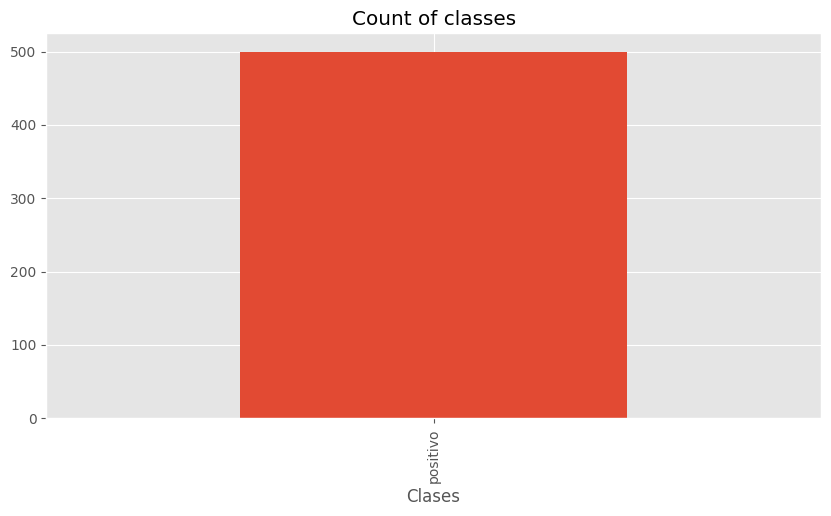

In [5]:
ax = df_few['sentimiento'].value_counts().plot(kind='bar',title='Count of classes', 
                                    figsize=(10,5))
ax.set_xlabel('Clases')
plt.show()

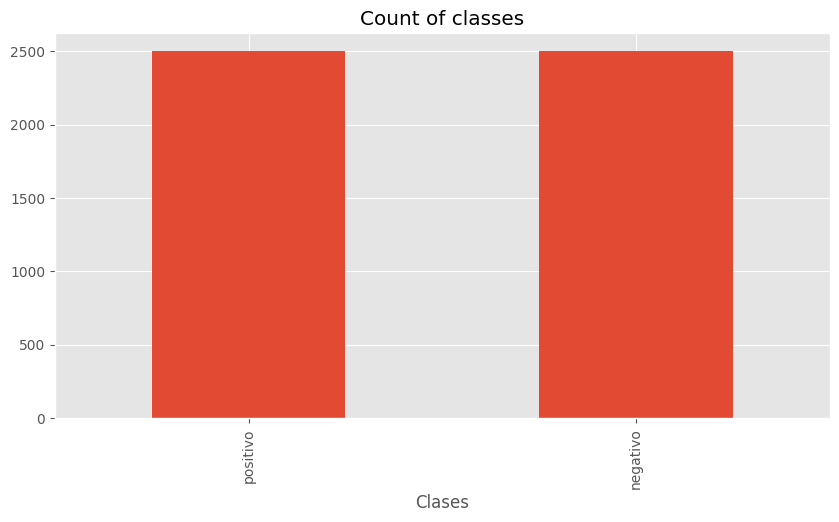

positivo    2500
negativo    2500
Name: sentimiento, dtype: int64

In [6]:
ax = df['sentimiento'].value_counts().plot(kind='bar',title='Count of classes', 
                                    figsize=(10,5))
ax.set_xlabel('Clases')
plt.show()

df['sentimiento'].value_counts()

Al hacer este analisis sobre el total de etiquetas para cada clase podemos ver que el problema tiene un conjunto de datos perfectamente balanceado, en particular $\frac{||Suic||}{||NonSuic||} = 1 $,  indicativo de que entre tamaño de las clases **no** es dispar en tamaño, luego no es necesario hacer un balanceo en etapas posteriores de procesamiento.

Con esto en consideracion, se procede a usar el archivo ya procesado por el flujo de limpieza de datos hecho en general para el proyecto

In [7]:
df_clean = pd.read_csv(os.path.join('.', 'input_data', 'MovieReviews_Clean.csv'), sep = ",")
df_clean = df_clean.rename({'Unnamed: 0': 'id'},axis=1)
df_clean.shape

(5000, 3)

In [8]:
df_clean.head()

,id,review_es,sentimiento
0,0,si está buscando una película de guerra típica...,positivo
1,1,supongo que algunos directores de películas de...,positivo
2,2,es difícil contarle más sobre esta película si...,positivo
3,3,la película comienza muy lentamente con el est...,positivo
4,4,esta película es verdadera acción en su máxima...,positivo


### Procesamiento NTLK basico

In [9]:
eg = df['review_es'][167]
cl_eg = df['sentimiento'][167] 
print(eg)
print(cl_eg)

Los hermanos Coen lo han vuelto a hacerlo. Tres convictos de la era de la depresión (George Clooney, John Turturro y Tim Blake Nelson) escapan a una pandilla de cadena Mississippi y se dirigió a la búsqueda del tesoro enterrado que financiará sus nuevas vidas. En el camino, cantan en la radio y se vuelven muy buscados, así como escapacos. Grandes risas y una banda sonora que es una lección / introducción a Bluegrass Music.Clooney es excepcional como el rápido que habla, use rápidamente Ulysses Everett McGill. Holly Hunter interpreta a su esposa alejada. Turturro y Nelson son trampas impecables. También en el elenco son John Goodman y Charles Durning.Dan Tyminksi proporciona la voz de canto para George Clooney en "Soy un hombre de tristeza constante", la canción de los chicos de fondo empapado que sirve como plantilla para la banda sonora de Bluegrass Laden que también cuenta con Alison Krauss, Ralph Stanley, los blancos, John Hartford, la familia Cox y Welch Gillian. Tocando el dedo de

En el ejemplo puede verse que el texto refiere a un sentimiento negativo y de fastidio pero dada la etiqueta, el texto es no suicida. 

In [10]:
tokens = nltk.word_tokenize(eg)
tokens[:10]

['Los', 'hermanos', 'Coen', 'lo', 'han', 'vuelto', 'a', 'hacerlo', '.', 'Tres']

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Los', 'NNP'),
 ('hermanos', 'JJ'),
 ('Coen', 'NNP'),
 ('lo', 'NN'),
 ('han', 'NN'),
 ('vuelto', 'VBZ'),
 ('a', 'DT'),
 ('hacerlo', 'NN'),
 ('.', '.'),
 ('Tres', 'VBZ')]

In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Los/NNP)
  hermanos/JJ
  Coen/NNP
  lo/NN
  han/NN
  vuelto/VBZ
  a/DT
  hacerlo/NN
  ./.
  Tres/VBZ
  convictos/NN
  de/IN
  la/FW
  era/FW
  de/FW
  la/FW
  depresión/FW
  (/(
  (PERSON George/NNP Clooney/NNP)
  ,/,
  (PERSON John/NNP Turturro/NNP)
  y/NNP
  Tim/NNP
  (PERSON Blake/NNP Nelson/NNP)
  )/)
  escapan/VBP
  a/DT
  una/JJ
  pandilla/NN
  de/IN
  cadena/FW
  Mississippi/NNP
  y/FW
  se/FW
  dirigió/FW
  a/DT
  la/NN
  búsqueda/NN
  del/NN
  tesoro/NN
  enterrado/NN
  que/NN
  financiará/JJ
  sus/NN
  nuevas/NN
  vidas/NN
  ./.
  En/NNP
  el/NN
  camino/NN
  ,/,
  cantan/NN
  en/NN
  la/NN
  radio/NN
  y/NN
  se/VBD
  vuelven/RB
  muy/JJ
  buscados/NN
  ,/,
  así/JJ
  como/NN
  escapacos/NN
  ./.
  Grandes/NNP
  risas/JJ
  y/NN
  una/JJ
  banda/NN
  sonora/NN
  que/NN
  es/NN
  una/JJ
  lección/NN
  //NNP
  introducción/VBZ
  a/DT
  (ORGANIZATION Bluegrass/NNP)
  Music.Clooney/NNP
  es/VBZ
  excepcional/JJ
  como/NN
  el/NN
  rápido/NN
  que/NN
  habla/NN
  ,/,
  u

### Enfoque de Analisis

El enfoque que se usara para procesar el texto estructurado que ya tenemos, es el analisis de sentimientos en las palabras o estructuras identificadas en un texto pasado por parametro.

En primera instancia se hara un analisis en base a una herramienta basada en lexico que usa diccionarios para clasificar las estructuras del texto como positivas, negativas o neutrales. 

En nuestro caso, como entrada de prueba se usuara el ejemplo que ya se estructuro y se le aplicara **VADER** (Valence Aware Dictionary and sEntiment Reasoner) que es es la herramienta de análisis de sentimientos basada en reglas y léxico escogida, que está específicamente entrenada con los sentimientos expresados ​​en las redes sociales y funciona bien en textos de otros dominios. 

En segunda instancia se hara un analisis de sentimientos en base a un modelo ya entrenado usando una tarea de *masked language modeling* (MLM) que es simplemente predecir qué palabra debria llenar los espacios en blanco de una oración, recibe de entrada una mascara de texto como "la pelicula estuvo una \[MASCARA\]", y retorna las posibles palabras que podrian llenar tal mascara.

El modelo a usar se llama **RoBERTa** (Robustly Optimized BERT Pretraining Approach) y ees un modelo de transformadores preentrenado en un gran cuerpo de datos en multiples idiomas (incluyendo el espanol) de manera autosupervisada. **RoBERTa** está destinado principalmente a ajustarse en una tarea especifica de modelado de lenguaje, que es nuestro caso es de sentimientos.

Haremos que tambien clasifique estructuras del texto en positivas, negativas o neutras pero, en este modelo ya se consideran las relaciones entre palabras y frases, asi como tambien el sarcasmo y mas comportamientos exhibidos por las personas cuando escriben algun texto.

## Paso 1: Analisis con **VADER**
    (Ya que VADER solo analisa textos en ingles fue necesario usar google sheets para traducir todo el dataset a review en ingles, y poder vislumbar bien el funcionamiento de este enfoque)
- El resultado de analisis de VADER es una 4-tupla, que contiene 3 puntajes general para todo el texto y un puntaje compuesto que toma en cuenta los otros 3.
    * $<PostiveScore, NeutralScore, NegativeScore, CompoundScore>$.
    * El rango de los primeros 3 puntajes es $[0,1]$ siendo 0 el valor que tomaria un puntaje si el texto no denota tal sentimiento y 1 siendo el mayor valor sentimental que podria tomar el texto en un puntaje concreto.
    * El rango del puntaje compuesto es $[-1,1]$, siendo -1 un sentimiento altamente negativo, 0 un sentimiento altamente neutral y 1 un sentimiento altamente positivo.

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores("Soy un miserable y patetico pedazo de mierda")

{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.4939}

In [15]:
sia.polarity_scores("Amigo, esto es increible")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
sia.polarity_scores(eg)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [58]:
 import translators as ts
 ts.translate_text(query_text=eg,translator="google",from_language='es', to_language='en')

'The Coen brothers have done it again. Three convicts of the era of depression (George Clooney, John Turturro and Tim Blake Nelson) escape a Mississippi chain gang and went to the search for the buried treasure that will finance their new lives. Along the way, they sing on the radio and become very sought after, as well as escapacos. Great laughs and a soundtrack that is a lesson / introduction to Bluegrass Music.Clooney is exceptional as the fast speech, use Ulysses Everett McGill quickly. Holly Hunter plays his remote wife. Turturro and Nelson are impeccable traps. Also in the cast are John Goodman and Charles Durning.dan Tyminksi provides the song of singing for George Clooney in "I am a man of constant sadness", the song of the boys in a soaked background that serves as a template for the soundtrack of Bluegrass Laden which also has Alison Krauss, Ralph Stanley, the Whites, John Hartford, the Cox and Welch Gillian family. Touching the foot of the foot, the knee with a fun for the w

In [63]:
df_trans_clean = pd.read_csv(os.path.join('.', 'input_data', 'Movies_Translated.csv'), sep = ",")
df_trans_clean = df_trans_clean.rename({'Unnamed: 0': 'id'},axis=1)
df_trans_clean.head()

,id,review_es,sentimiento,translated_text
0,0,si está buscando una película de guerra típica...,positivo,"If you are looking for a typical war film, thi..."
1,1,supongo que algunos directores de películas de...,positivo,I suppose that some luxury films directors wer...
2,2,es difícil contarle más sobre esta película si...,positivo,It is difficult to tell him more about this mo...
3,3,la película comienza muy lentamente con el est...,positivo,The film begins very slowly with the lifestyle...
4,4,esta película es verdadera acción en su máxima...,positivo,This film is true action at its maximum expres...


In [65]:
res = {}
puteao = []
for i, row in tqdm(df_trans_clean.iterrows(), total=len(df_trans_clean)):
    try:
        text = row['translated_text']
        df_id = row['id']
        res[df_id] = sia.polarity_scores(text)
    except AttributeError:
        puteao.append(df_id)
        print(len(puteao))


100%|██████████| 5000/5000 [00:17<00:00, 291.70it/s]


In [66]:
print(len(res))

5000


In [67]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df_clean, how='left')

In [68]:
vaders.head()

,id,neg,neu,pos,compound,review_es,sentimiento
0,0,0.106,0.762,0.132,0.8597,si está buscando una película de guerra típica...,positivo
1,1,0.086,0.689,0.224,0.9842,supongo que algunos directores de películas de...,positivo
2,2,0.055,0.817,0.129,0.8715,es difícil contarle más sobre esta película si...,positivo
3,3,0.187,0.743,0.071,-0.8748,la película comienza muy lentamente con el est...,positivo
4,4,0.062,0.759,0.179,0.9533,esta película es verdadera acción en su máxima...,positivo


## Supuestos

* Tomaremos de supuestos:
    - $h_1$: Los textos con un score compuesto negativo son textos con la etiqueta "negativo"
    - $h_1^c$: Los textos con un score compuesto positivo son textos con la etiqueta "positivo"
    - $h_2$: Los textos con un score negativo alto son textos con la etiqueta "negativo"
    - $h_2^c$: Los textos con un score positivo alto son textos con la etiqueta "positivo"

Para su comprobacion se hara uso de los resultados del procesamiento hecho sobre VADER, en los datos de resenas de peliculas.

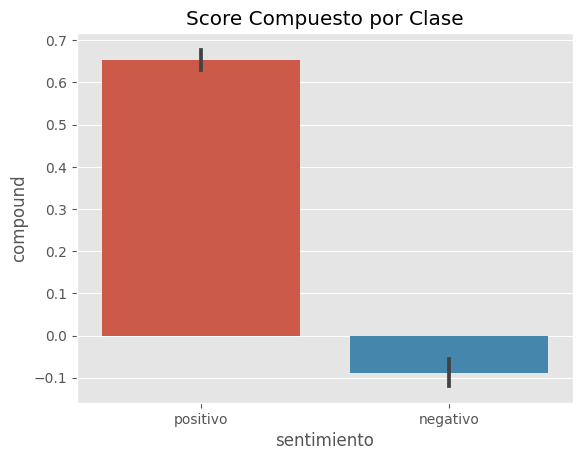

In [69]:
ax = sns.barplot(data=vaders, x='sentimiento', y='compound')
ax.set_title('Score Compuesto por Clase')
plt.show()

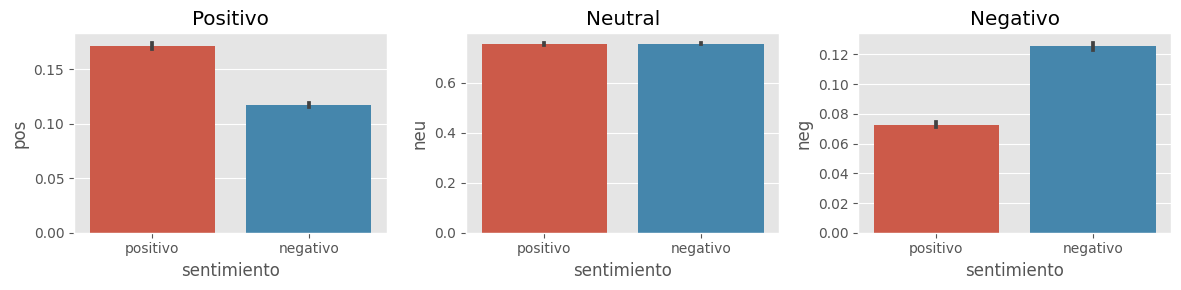

In [70]:
fig, axs = plt.subplots(1, 3,figsize=(12,3))
sns.barplot(data=vaders, x='sentimiento', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='sentimiento', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='sentimiento', y='neg', ax=axs[2])
axs[0].set_title('Positivo')
axs[1].set_title('Neutral')
axs[2].set_title('Negativo')
plt.tight_layout()
plt.show()

## Analisis con el modelo pre-entrenado RoBERTa

In [23]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoConfig
from scipy.special import softmax

In [24]:
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")
config = AutoConfig.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")
model.save_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")

c:\Users\Usuario\Desktop\UNI\BI\B_env\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Usuario\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [25]:
print(eg)
sia.polarity_scores(eg)

Los hermanos Coen lo han vuelto a hacerlo. Tres convictos de la era de la depresión (George Clooney, John Turturro y Tim Blake Nelson) escapan a una pandilla de cadena Mississippi y se dirigió a la búsqueda del tesoro enterrado que financiará sus nuevas vidas. En el camino, cantan en la radio y se vuelven muy buscados, así como escapacos. Grandes risas y una banda sonora que es una lección / introducción a Bluegrass Music.Clooney es excepcional como el rápido que habla, use rápidamente Ulysses Everett McGill. Holly Hunter interpreta a su esposa alejada. Turturro y Nelson son trampas impecables. También en el elenco son John Goodman y Charles Durning.Dan Tyminksi proporciona la voz de canto para George Clooney en "Soy un hombre de tristeza constante", la canción de los chicos de fondo empapado que sirve como plantilla para la banda sonora de Bluegrass Laden que también cuenta con Alison Krauss, Ralph Stanley, los blancos, John Hartford, la familia Cox y Welch Gillian. Tocando el dedo de

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [26]:
tokenizer.model_max_length=100000000000000

In [27]:
tokenizer.model_max_length

100000000000000

In [28]:
encoded_text = tokenizer(eg, return_tensors='pt')
output = model(encoded_text['input_ids'],encoded_text['attention_mask'])

scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    
    'roberta_neu': scores[1],
    
    'roberta_pos': scores[2],
}

print(scores_dict)


{'roberta_neg': 0.32822815, 'roberta_neu': 0.37837037, 'roberta_pos': 0.29340148}


In [29]:
test= tokenizer("increible mi hermano :)", return_tensors='pt')
output = model(test['input_ids'],test['attention_mask'])
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    
    'roberta_neu': scores[1],
    
    'roberta_pos': scores[2],
}

print(scores_dict)

{'roberta_neg': 0.017584004, 'roberta_neu': 0.04447494, 'roberta_pos': 0.9379411}


In [30]:
print(len(encoded_text['input_ids'][0]))
print(len(encoded_text['attention_mask'][0]))

286
286


In [31]:
len(test['input_ids'][0])

8

In [32]:
test

{'input_ids': tensor([[     0,     23,   7612,  28236,    324, 131218,   1094,      2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

# Limitaciones de **RoBERTa**
    (o cualquier modelo de transformadores a pequena escala, porque chatgpt ya no tiene este problema)

El modelo RoBERTa, solo puede procesar *textos cortos* (como los tweets), mas especificamente, textos que no generen mas de 512 tokens al realizar el preprocesamiento para estructurar el texto, y mas tecnicamente, textos que junto con los *tags* puestos por el tokenizer, \[CLS\] y \[SEP\], no generen mas de 514 tokens. Capacidad que ya se vio superada con creces por el modelo de NLP basado en transformadores GPT-3, GPT-3.5 y porsupuesto GPT-4-32k que cuenta ahora con la capacidad de evaluar textos que generen hasta **32000 tokens**

Luego es necesario considerar una manera de procesar nuestro ejemplo, y en particular, los textos a procesar dentro de los datos que sean medianamente largos o realmente largos. 

Nuestra propuesta es:

1. **dividir** toda la tokenizacion en segmentos de 512 tokens, esto es $\frac{||text||}{512}$.
2. Modificar los tokens para que sean validos , es decir, añadir *tags* manualmente al tensor que retorna la tokenizacion 
3. Procesar los tensores en RoBERTa.
4. Realizar un promedio ponderado de los puntajes de cada uno de los tensores. 
5. Se retorna ese promedio y se almacena. 


### ¿Por qué no en pedazos de 514? 
Porque habra que añadir manualmente los tags del modelo despues de dividir la tokenizacion en segmentos de 512 tokens.


In [33]:
def sentiment_roberta(tokens):
    # get output logits from the model
    output = model(**tokens)
    # convert to probabilities
    probs = torch.nn.functional.softmax(output[0], dim=-1)
    probs = probs.detach().numpy()
    N =len(probs)

    neg,neu,pos=0,0,0

    for tensor in probs:
        neg +=tensor[0]
        neu +=tensor[1]
        pos +=tensor[2]

    probs_dict = {
            'roberta_neg': neg/N,
            'roberta_neu': neu/N,
            'roberta_pos': pos/N,
        }    
    return probs_dict

In [34]:

chunksize = 512

input_id_chunks = list(encoded_text['input_ids'][0].split(int(chunksize - 2)))
mask_chunks = list(encoded_text['attention_mask'][0].split(int(chunksize - 2)))

for i in range(len(input_id_chunks)):
    # añadir CLS y SEP a cada chunck de tokens
    input_id_chunks[i] = torch.cat([
        torch.tensor([101]), input_id_chunks[i], torch.tensor([102])
    ])
    # añádir los attention tokens el padding de los tags
    mask_chunks[i] = torch.cat([
        torch.tensor([1]), mask_chunks[i], torch.tensor([1])
    ])
    #calcular el tamaño del padding 
    pad_len = chunksize - input_id_chunks[i].shape[0]
    # revisar si la longitud del padding en el tensor es la requerida
    if pad_len > 0:
        # en caso de que no, se añade el padding necesario
        input_id_chunks[i] = torch.cat([
            input_id_chunks[i], torch.Tensor([0] * pad_len)
        ])
        mask_chunks[i] = torch.cat([
            mask_chunks[i], torch.Tensor([0] * pad_len)
        ])

for chunk in input_id_chunks:
    print(len(chunk))
# imprimir el chunk final para ver si quedo bien configurado
chunk

512


tensor([1.0100e+02, 0.0000e+00, 3.7310e+03, 1.3122e+05, 7.0000e+00, 1.3110e+03,
        3.3000e+01, 4.5900e+02, 7.7700e+02, 8.1000e+01, 2.0129e+04, 1.8800e+02,
        1.0000e+01, 6.5661e+04, 5.0000e+00, 8.4790e+04, 1.5800e+02, 2.1605e+04,
        1.9520e+03, 8.0000e+00, 2.1000e+01, 1.6150e+03, 8.0000e+00, 2.1000e+01,
        8.0000e+00, 9.3381e+04, 1.5000e+01, 2.0550e+05, 5.1053e+04, 3.6300e+03,
        5.3000e+01, 4.0000e+00, 4.9390e+03, 4.2520e+03, 9.8700e+02, 5.1600e+02,
        1.1300e+02, 1.3320e+04, 1.9550e+05, 9.9331e+04, 1.6000e+01, 1.5439e+05,
        1.9000e+01, 1.0000e+01, 2.2000e+02, 8.9174e+04, 2.2980e+03, 8.0000e+00,
        1.1503e+05, 2.2526e+05, 1.1300e+02, 4.0000e+01, 9.8086e+04, 8.4900e+02,
        1.0000e+01, 2.1000e+01, 9.7449e+04, 1.4600e+02, 2.1555e+05, 3.0957e+04,
        1.6211e+04, 4.1000e+01, 6.7225e+04, 7.0900e+02, 1.8170e+03, 4.6094e+04,
        6.1866e+04, 5.0000e+00, 3.5700e+02, 8.8000e+01, 4.6571e+04, 4.0000e+00,
        8.3100e+02, 1.0760e+03, 2.2000e+

In [35]:
input_ids = torch.stack(input_id_chunks)
attention_mask = torch.stack(mask_chunks)

input_dict = {
    'input_ids': input_ids.long(),
    'attention_mask': attention_mask.int()
}
input_dict

{'input_ids': tensor([[   101,      0,   3731, 131218,      7,   1311,     33,    459,    777,
              81,  20129,    188,     10,  65661,      5,  84790,    158,  21605,
            1952,      8,     21,   1615,      8,     21,      8,  93381,     15,
          205503,  51053,   3630,     53,      4,   4939,   4252,    987,    516,
             113,  13320, 195501,  99331,     16, 154388,     19,     10,    220,
           89174,   2298,      8, 115029, 225260,    113,     40,  98086,    849,
              10,     21,  97449,    146, 215552,  30957,  16211,     41,  67225,
             709,   1817,  46094,  61866,      5,    357,     88,  46571,      4,
             831,   1076,     22,     21,   5977,    113,     40, 134300,     19,
            3591,  13773,   1140,      4,   4705,    533, 154388,   7840,      5,
           22634,      7,  67786,      7,    113,    220,  10247, 149126,     41,
             198,    220,     95,  14618,    248,  39864,   1150,     10,  22928,
   

In [36]:
sentiment_roberta(input_dict)

{'roberta_neg': 0.2971102297306061,
 'roberta_neu': 0.36257898807525635,
 'roberta_pos': 0.3403107821941376}

In [37]:
def chunkify_tokens(ptokens):  
    
    chunksize = 512

    input_id_chunks = list(ptokens['input_ids'][0].split(int(chunksize - 2)))
    mask_chunks = list(ptokens['attention_mask'][0].split(int(chunksize - 2)))

    for i in range(len(input_id_chunks)):
        # añadir CLS y SEP a cada chunck de tokens
        input_id_chunks[i] = torch.cat([
            torch.tensor([101]), input_id_chunks[i], torch.tensor([102])
        ])
        # añádir los attention tokens el padding de los tags
        mask_chunks[i] = torch.cat([
            torch.tensor([1]), mask_chunks[i], torch.tensor([1])
        ])
        #calcular el tamaño del padding 
        pad_len = chunksize - input_id_chunks[i].shape[0]
        # revisar si la longitud del padding en el tensor es la requerida
        if pad_len > 0:
            # en caso de que no, se añade el padding necesario
            input_id_chunks[i] = torch.cat([
                input_id_chunks[i], torch.Tensor([0] * pad_len)
            ])
            mask_chunks[i] = torch.cat([
                mask_chunks[i], torch.Tensor([0] * pad_len)
            ])
        input_ids = torch.stack(input_id_chunks)
        attention_mask = torch.stack(mask_chunks)

        input_dict = {
            'input_ids': input_ids.long(),
            'attention_mask': attention_mask.int()
            }
        return input_dict  


In [38]:
def polarity_scores_roberta(text):
    tokens = tokenizer(text, return_tensors='pt')
    if len(tokens[0]) > 512:
        input_dict = chunkify_tokens(tokens)
        r_dict = sentiment_roberta(input_dict)
    else:
        r_dict = sentiment_roberta(tokens)
    return r_dict

In [39]:
res = {}
puteaoRuntime = []
for i, row in tqdm(df_clean.iterrows(), total=len(df_clean)):
    try:
        text = row['review_es']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        puteaoRuntime.append(myid)
        print(f'puteao en Runtime {len(puteaoRuntime)}')
    except AttributeError:
        puteao.append(myid)
        print(f'puteao {len(puteao)}')



  0%|          | 9/5000 [00:04<50:46,  1.64it/s]

puteao en Runtime 1
puteao en Runtime 2


  0%|          | 16/5000 [00:08<48:04,  1.73it/s]

puteao en Runtime 3


  1%|          | 34/5000 [00:17<37:30,  2.21it/s]

puteao en Runtime 4
puteao en Runtime 5


  1%|          | 39/5000 [00:18<21:55,  3.77it/s]

puteao en Runtime 6


  1%|          | 46/5000 [00:21<30:12,  2.73it/s]

puteao en Runtime 7


  1%|▏         | 66/5000 [00:29<42:02,  1.96it/s]

puteao en Runtime 8


  2%|▏         | 80/5000 [00:33<17:39,  4.64it/s]

puteao en Runtime 9


  2%|▏         | 83/5000 [00:36<46:54,  1.75it/s]

puteao en Runtime 10


  2%|▏         | 89/5000 [00:38<48:37,  1.68it/s]

puteao en Runtime 11


  2%|▏         | 113/5000 [00:50<39:27,  2.06it/s] 

puteao en Runtime 12


  3%|▎         | 127/5000 [00:57<46:40,  1.74it/s]

puteao en Runtime 13


  3%|▎         | 129/5000 [00:57<32:54,  2.47it/s]

puteao en Runtime 14


  3%|▎         | 143/5000 [01:03<35:26,  2.28it/s]

puteao en Runtime 15
puteao en Runtime 16


  3%|▎         | 149/5000 [01:04<23:03,  3.51it/s]

puteao en Runtime 17


  3%|▎         | 153/5000 [01:05<24:38,  3.28it/s]

puteao en Runtime 18


  3%|▎         | 155/5000 [01:05<19:46,  4.08it/s]

puteao en Runtime 19


  3%|▎         | 160/5000 [01:07<21:00,  3.84it/s]

puteao en Runtime 20
puteao en Runtime 21


  3%|▎         | 168/5000 [01:09<29:25,  2.74it/s]

puteao en Runtime 22


  4%|▎         | 175/5000 [01:12<28:30,  2.82it/s]

puteao en Runtime 23


  4%|▎         | 179/5000 [01:15<45:07,  1.78it/s]

puteao en Runtime 24


  4%|▍         | 188/5000 [01:17<20:53,  3.84it/s]

puteao en Runtime 25


  4%|▍         | 190/5000 [01:18<18:57,  4.23it/s]

puteao en Runtime 26


  4%|▍         | 217/5000 [01:29<30:14,  2.64it/s]

puteao en Runtime 27


  5%|▍         | 226/5000 [01:32<22:25,  3.55it/s]

puteao en Runtime 28


  5%|▍         | 238/5000 [01:36<32:23,  2.45it/s]

puteao en Runtime 29


  5%|▍         | 240/5000 [01:37<28:57,  2.74it/s]

puteao en Runtime 30


  5%|▍         | 248/5000 [01:39<33:12,  2.38it/s]

puteao en Runtime 31


  5%|▌         | 250/5000 [01:40<25:32,  3.10it/s]

puteao en Runtime 32


  6%|▌         | 275/5000 [01:50<43:44,  1.80it/s]

puteao en Runtime 33


  6%|▌         | 280/5000 [01:51<28:19,  2.78it/s]

puteao en Runtime 34
puteao en Runtime 35


  6%|▌         | 301/5000 [01:58<38:36,  2.03it/s]

puteao en Runtime 36


  6%|▌         | 307/5000 [02:00<18:19,  4.27it/s]

puteao en Runtime 37


  6%|▌         | 309/5000 [02:01<41:23,  1.89it/s]

puteao en Runtime 38


  6%|▋         | 315/5000 [02:03<32:36,  2.39it/s]

puteao en Runtime 39


  6%|▋         | 318/5000 [02:04<29:01,  2.69it/s]

puteao en Runtime 40


  6%|▋         | 323/5000 [02:06<32:38,  2.39it/s]

puteao en Runtime 41


  7%|▋         | 341/5000 [02:14<21:08,  3.67it/s]  

puteao en Runtime 42
puteao en Runtime 43
puteao en Runtime 44
puteao en Runtime 45


  7%|▋         | 360/5000 [02:20<35:05,  2.20it/s]

puteao en Runtime 46


  7%|▋         | 362/5000 [02:21<26:22,  2.93it/s]

puteao en Runtime 47


  7%|▋         | 366/5000 [02:22<25:17,  3.05it/s]

puteao en Runtime 48
puteao en Runtime 49
puteao en Runtime 50


  8%|▊         | 377/5000 [02:26<42:17,  1.82it/s]

puteao en Runtime 51


  8%|▊         | 383/5000 [02:29<39:08,  1.97it/s]

puteao en Runtime 52


  8%|▊         | 386/5000 [02:30<25:24,  3.03it/s]

puteao en Runtime 53


  8%|▊         | 396/5000 [02:33<29:29,  2.60it/s]

puteao en Runtime 54


  8%|▊         | 401/5000 [02:35<28:50,  2.66it/s]

puteao en Runtime 55


  8%|▊         | 407/5000 [02:36<18:08,  4.22it/s]

puteao en Runtime 56
puteao en Runtime 57


  9%|▊         | 427/5000 [02:44<22:26,  3.40it/s]

puteao en Runtime 58


  9%|▊         | 428/5000 [02:44<26:47,  2.84it/s]

puteao en Runtime 59


  9%|▊         | 436/5000 [02:45<13:16,  5.73it/s]

puteao en Runtime 60


  9%|▉         | 440/5000 [02:47<25:16,  3.01it/s]

puteao en Runtime 61


  9%|▉         | 445/5000 [02:50<31:42,  2.39it/s]

puteao en Runtime 62
puteao en Runtime 63


  9%|▉         | 462/5000 [02:56<30:29,  2.48it/s]

puteao en Runtime 64


  9%|▉         | 466/5000 [02:57<27:15,  2.77it/s]

puteao en Runtime 65


  9%|▉         | 473/5000 [03:02<44:47,  1.68it/s]

puteao en Runtime 66


 10%|▉         | 482/5000 [03:05<34:28,  2.18it/s]

puteao en Runtime 67


 10%|▉         | 488/5000 [03:07<31:01,  2.42it/s]

puteao en Runtime 68
puteao en Runtime 69


 10%|▉         | 493/5000 [03:08<16:01,  4.69it/s]

puteao en Runtime 70
puteao en Runtime 71


 10%|▉         | 495/5000 [03:08<18:16,  4.11it/s]

puteao en Runtime 72


 10%|█         | 501/5000 [03:10<14:51,  5.05it/s]

puteao en Runtime 73


 10%|█         | 504/5000 [03:10<15:05,  4.97it/s]

puteao en Runtime 74


 10%|█         | 515/5000 [03:15<32:24,  2.31it/s]

puteao en Runtime 75
puteao en Runtime 76


 10%|█         | 519/5000 [03:16<32:58,  2.27it/s]

puteao en Runtime 77


 10%|█         | 523/5000 [03:17<25:10,  2.96it/s]

puteao en Runtime 78


 11%|█         | 551/5000 [03:31<49:35,  1.50it/s]

puteao en Runtime 79


 11%|█▏        | 564/5000 [03:40<1:07:23,  1.10it/s]

puteao en Runtime 80


 11%|█▏        | 566/5000 [03:40<47:58,  1.54it/s]  

puteao en Runtime 81


 11%|█▏        | 569/5000 [03:42<44:49,  1.65it/s]

puteao en Runtime 82


 12%|█▏        | 579/5000 [03:49<52:27,  1.40it/s]  

puteao en Runtime 83


 12%|█▏        | 584/5000 [03:51<46:03,  1.60it/s]

puteao en Runtime 84


 12%|█▏        | 590/5000 [03:54<40:45,  1.80it/s]

puteao en Runtime 85


 12%|█▏        | 600/5000 [04:02<59:58,  1.22it/s]  

puteao en Runtime 86


 12%|█▏        | 607/5000 [04:07<53:02,  1.38it/s]  

puteao en Runtime 87


 12%|█▏        | 618/5000 [04:16<58:04,  1.26it/s]  

puteao en Runtime 88


 12%|█▏        | 620/5000 [04:19<1:09:10,  1.06it/s]

puteao en Runtime 89


 12%|█▏        | 622/5000 [04:19<47:51,  1.52it/s]  

puteao en Runtime 90


 13%|█▎        | 626/5000 [04:22<47:11,  1.54it/s]

puteao en Runtime 91


 13%|█▎        | 641/5000 [04:31<34:05,  2.13it/s]  

puteao en Runtime 92


 13%|█▎        | 644/5000 [04:33<33:56,  2.14it/s]

puteao en Runtime 93


 13%|█▎        | 649/5000 [04:35<31:47,  2.28it/s]

puteao en Runtime 94


 13%|█▎        | 656/5000 [04:41<1:18:41,  1.09s/it]

puteao en Runtime 95


 13%|█▎        | 661/5000 [04:44<47:46,  1.51it/s]  

puteao en Runtime 96
puteao en Runtime 97


 13%|█▎        | 664/5000 [04:44<33:03,  2.19it/s]

puteao en Runtime 98


 13%|█▎        | 666/5000 [04:45<25:36,  2.82it/s]

puteao en Runtime 99


 13%|█▎        | 673/5000 [04:51<49:28,  1.46it/s]  

puteao en Runtime 100


 14%|█▎        | 675/5000 [04:51<37:40,  1.91it/s]

puteao en Runtime 101
puteao en Runtime 102


 14%|█▍        | 697/5000 [05:08<1:12:06,  1.01s/it]

puteao en Runtime 103


 14%|█▍        | 703/5000 [05:12<1:08:22,  1.05it/s]

puteao en Runtime 104


 14%|█▍        | 712/5000 [05:18<51:38,  1.38it/s]  

puteao en Runtime 105


 14%|█▍        | 715/5000 [05:19<40:32,  1.76it/s]

puteao en Runtime 106


 14%|█▍        | 718/5000 [05:20<36:22,  1.96it/s]

puteao en Runtime 107


 15%|█▍        | 731/5000 [05:31<1:24:59,  1.19s/it]

puteao en Runtime 108


 15%|█▍        | 738/5000 [05:36<1:02:03,  1.14it/s]

puteao en Runtime 109


 15%|█▍        | 742/5000 [05:39<59:03,  1.20it/s]  

puteao en Runtime 110
puteao en Runtime 111


 15%|█▌        | 756/5000 [05:50<57:58,  1.22it/s]  

puteao en Runtime 112


 15%|█▌        | 761/5000 [05:53<44:11,  1.60it/s]

puteao en Runtime 113


 15%|█▌        | 769/5000 [05:58<44:19,  1.59it/s]

puteao en Runtime 114


 16%|█▌        | 787/5000 [06:06<33:51,  2.07it/s]

puteao en Runtime 115


 16%|█▌        | 789/5000 [06:07<27:49,  2.52it/s]

puteao en Runtime 116


 16%|█▌        | 801/5000 [06:14<52:03,  1.34it/s]

puteao en Runtime 117


 16%|█▋        | 815/5000 [06:25<32:35,  2.14it/s]  

puteao en Runtime 118


 16%|█▋        | 825/5000 [06:33<45:22,  1.53it/s]

puteao en Runtime 119


 17%|█▋        | 836/5000 [06:41<56:03,  1.24it/s]  

puteao en Runtime 120
puteao en Runtime 121


 17%|█▋        | 841/5000 [06:44<48:12,  1.44it/s]

puteao en Runtime 122


 17%|█▋        | 845/5000 [06:45<36:21,  1.90it/s]

puteao en Runtime 123


 17%|█▋        | 851/5000 [06:50<1:04:16,  1.08it/s]

puteao en Runtime 124


 17%|█▋        | 855/5000 [06:51<35:50,  1.93it/s]  

puteao en Runtime 125


 17%|█▋        | 859/5000 [06:54<52:50,  1.31it/s]

puteao en Runtime 126


 17%|█▋        | 865/5000 [06:57<44:27,  1.55it/s]

puteao en Runtime 127
puteao en Runtime 128


 17%|█▋        | 872/5000 [06:59<27:35,  2.49it/s]

puteao en Runtime 129


 18%|█▊        | 882/5000 [07:05<41:54,  1.64it/s]

puteao en Runtime 130


 18%|█▊        | 885/5000 [07:06<36:13,  1.89it/s]

puteao en Runtime 131
puteao en Runtime 132


 18%|█▊        | 893/5000 [07:12<53:43,  1.27it/s]

puteao en Runtime 133


 18%|█▊        | 904/5000 [07:19<42:05,  1.62it/s]  

puteao en Runtime 134


 18%|█▊        | 914/5000 [07:30<1:15:03,  1.10s/it]

puteao en Runtime 135


 18%|█▊        | 922/5000 [07:36<1:01:33,  1.10it/s]

puteao en Runtime 136
puteao en Runtime 137


 19%|█▊        | 931/5000 [07:41<37:43,  1.80it/s]  

puteao en Runtime 138


 19%|█▉        | 939/5000 [07:45<42:34,  1.59it/s]

puteao en Runtime 139


 19%|█▉        | 946/5000 [07:48<33:28,  2.02it/s]

puteao en Runtime 140


 19%|█▉        | 958/5000 [07:56<36:12,  1.86it/s]  

puteao en Runtime 141


 20%|█▉        | 990/5000 [08:20<1:09:45,  1.04s/it]

puteao en Runtime 142


 20%|█▉        | 997/5000 [08:25<43:21,  1.54it/s]  

puteao en Runtime 143


 20%|██        | 1006/5000 [08:31<41:04,  1.62it/s]

puteao en Runtime 144
puteao en Runtime 145


 20%|██        | 1009/5000 [08:32<26:52,  2.47it/s]

puteao en Runtime 146


 20%|██        | 1020/5000 [08:37<26:01,  2.55it/s]

puteao en Runtime 147
puteao en Runtime 148


 20%|██        | 1024/5000 [08:38<25:29,  2.60it/s]

puteao en Runtime 149


 21%|██        | 1030/5000 [08:41<28:55,  2.29it/s]

puteao en Runtime 150


 21%|██        | 1032/5000 [08:41<22:17,  2.97it/s]

puteao en Runtime 151


 21%|██        | 1038/5000 [08:43<26:32,  2.49it/s]

puteao en Runtime 152


 21%|██        | 1042/5000 [08:46<35:15,  1.87it/s]

puteao en Runtime 153


 21%|██        | 1062/5000 [09:00<54:06,  1.21it/s]

puteao en Runtime 154


 21%|██▏       | 1066/5000 [09:01<27:47,  2.36it/s]

puteao en Runtime 155


 21%|██▏       | 1071/5000 [09:02<19:15,  3.40it/s]

puteao en Runtime 156


 21%|██▏       | 1073/5000 [09:02<14:59,  4.36it/s]

puteao en Runtime 157


 22%|██▏       | 1078/5000 [09:04<24:42,  2.65it/s]

puteao en Runtime 158


 22%|██▏       | 1083/5000 [09:07<35:44,  1.83it/s]

puteao en Runtime 159


 22%|██▏       | 1086/5000 [09:08<29:30,  2.21it/s]

puteao en Runtime 160


 22%|██▏       | 1092/5000 [09:12<44:20,  1.47it/s]

puteao en Runtime 161


 22%|██▏       | 1114/5000 [09:29<56:09,  1.15it/s]  

puteao en Runtime 162


 22%|██▏       | 1120/5000 [09:31<30:51,  2.10it/s]

puteao en Runtime 163


 22%|██▏       | 1124/5000 [09:33<29:19,  2.20it/s]

puteao en Runtime 164


 23%|██▎       | 1129/5000 [09:37<47:14,  1.37it/s]

puteao en Runtime 165


 23%|██▎       | 1132/5000 [09:39<39:23,  1.64it/s]

puteao en Runtime 166
puteao en Runtime 167
puteao en Runtime 168


 23%|██▎       | 1156/5000 [09:54<52:02,  1.23it/s]

puteao en Runtime 169


 23%|██▎       | 1169/5000 [10:01<36:14,  1.76it/s]

puteao en Runtime 170


 23%|██▎       | 1173/5000 [10:04<52:32,  1.21it/s]

puteao en Runtime 171


 24%|██▎       | 1176/5000 [10:04<29:36,  2.15it/s]

puteao en Runtime 172
puteao en Runtime 173


 24%|██▎       | 1182/5000 [10:07<29:14,  2.18it/s]

puteao en Runtime 174


 24%|██▎       | 1185/5000 [10:08<23:40,  2.69it/s]

puteao en Runtime 175
puteao en Runtime 176


 24%|██▍       | 1194/5000 [10:13<39:23,  1.61it/s]

puteao en Runtime 177


 24%|██▍       | 1203/5000 [10:17<32:51,  1.93it/s]

puteao en Runtime 178


 24%|██▍       | 1211/5000 [10:21<39:15,  1.61it/s]

puteao en Runtime 179


 24%|██▍       | 1215/5000 [10:23<35:53,  1.76it/s]

puteao en Runtime 180


 24%|██▍       | 1222/5000 [10:27<43:01,  1.46it/s]

puteao en Runtime 181


 25%|██▍       | 1244/5000 [10:40<46:40,  1.34it/s]

puteao en Runtime 182


 25%|██▍       | 1249/5000 [10:41<23:43,  2.64it/s]

puteao en Runtime 183


 25%|██▌       | 1259/5000 [10:49<36:28,  1.71it/s]  

puteao en Runtime 184
puteao en Runtime 185
puteao en Runtime 186


 25%|██▌       | 1267/5000 [10:53<38:13,  1.63it/s]

puteao en Runtime 187


 25%|██▌       | 1269/5000 [10:55<42:16,  1.47it/s]

puteao en Runtime 188


 25%|██▌       | 1273/5000 [10:57<40:33,  1.53it/s]

puteao en Runtime 189


 26%|██▌       | 1281/5000 [11:03<44:16,  1.40it/s]

puteao en Runtime 190


 26%|██▌       | 1291/5000 [11:10<51:24,  1.20it/s]

puteao en Runtime 191


 26%|██▌       | 1297/5000 [11:13<45:06,  1.37it/s]

puteao en Runtime 192


 26%|██▌       | 1312/5000 [11:28<1:15:52,  1.23s/it]

puteao en Runtime 193


 26%|██▋       | 1315/5000 [11:30<54:09,  1.13it/s]  

puteao en Runtime 194


 27%|██▋       | 1334/5000 [11:41<29:00,  2.11it/s]

puteao en Runtime 195


 27%|██▋       | 1341/5000 [11:46<54:38,  1.12it/s]

puteao en Runtime 196
puteao en Runtime 197


 27%|██▋       | 1344/5000 [11:47<35:18,  1.73it/s]

puteao en Runtime 198


 27%|██▋       | 1346/5000 [11:48<30:25,  2.00it/s]

puteao en Runtime 199


 27%|██▋       | 1350/5000 [11:51<37:42,  1.61it/s]

puteao en Runtime 200
puteao en Runtime 201
puteao en Runtime 202


 27%|██▋       | 1360/5000 [11:54<24:32,  2.47it/s]

puteao en Runtime 203


 27%|██▋       | 1374/5000 [12:02<39:56,  1.51it/s]

puteao en Runtime 204


 28%|██▊       | 1383/5000 [12:07<28:52,  2.09it/s]

puteao en Runtime 205


 28%|██▊       | 1397/5000 [12:19<1:15:31,  1.26s/it]

puteao en Runtime 206


 28%|██▊       | 1406/5000 [12:25<34:29,  1.74it/s]  

puteao en Runtime 207
puteao en Runtime 208


 28%|██▊       | 1410/5000 [12:28<36:07,  1.66it/s]

puteao en Runtime 209


 28%|██▊       | 1414/5000 [12:29<31:14,  1.91it/s]

puteao en Runtime 210


 28%|██▊       | 1424/5000 [12:37<38:29,  1.55it/s]

puteao en Runtime 211


 29%|██▊       | 1436/5000 [12:45<39:56,  1.49it/s]

puteao en Runtime 212


 29%|██▉       | 1449/5000 [12:51<25:16,  2.34it/s]

puteao en Runtime 213
puteao en Runtime 214


 29%|██▉       | 1460/5000 [12:55<27:05,  2.18it/s]

puteao en Runtime 215


 29%|██▉       | 1467/5000 [12:59<28:45,  2.05it/s]

puteao en Runtime 216
puteao en Runtime 217


 29%|██▉       | 1472/5000 [13:00<20:02,  2.93it/s]

puteao en Runtime 218


 30%|██▉       | 1476/5000 [13:03<32:19,  1.82it/s]

puteao en Runtime 219


 30%|██▉       | 1479/5000 [13:04<30:34,  1.92it/s]

puteao en Runtime 220
puteao en Runtime 221


 30%|██▉       | 1484/5000 [13:07<35:50,  1.63it/s]

puteao en Runtime 222


 30%|██▉       | 1491/5000 [13:10<26:09,  2.24it/s]

puteao en Runtime 223


 30%|██▉       | 1497/5000 [13:14<40:30,  1.44it/s]

puteao en Runtime 224


 30%|███       | 1524/5000 [13:33<33:25,  1.73it/s]

puteao en Runtime 225


 31%|███       | 1535/5000 [13:41<46:38,  1.24it/s]  

puteao en Runtime 226


 31%|███       | 1537/5000 [13:41<30:44,  1.88it/s]

puteao en Runtime 227


 31%|███       | 1555/5000 [13:49<14:05,  4.07it/s]

puteao en Runtime 228
puteao en Runtime 229


 31%|███▏      | 1566/5000 [13:57<36:27,  1.57it/s]

puteao en Runtime 230


 31%|███▏      | 1568/5000 [13:57<22:52,  2.50it/s]

puteao en Runtime 231


 31%|███▏      | 1571/5000 [13:58<27:53,  2.05it/s]

puteao en Runtime 232


 32%|███▏      | 1602/5000 [14:16<27:38,  2.05it/s]  

puteao en Runtime 233
puteao en Runtime 234


 32%|███▏      | 1605/5000 [14:17<24:51,  2.28it/s]

puteao en Runtime 235


 32%|███▏      | 1614/5000 [14:22<36:07,  1.56it/s]

puteao en Runtime 236


 33%|███▎      | 1627/5000 [14:28<27:11,  2.07it/s]

puteao en Runtime 237
puteao en Runtime 238
puteao en Runtime 239


 33%|███▎      | 1636/5000 [14:30<15:45,  3.56it/s]

puteao en Runtime 240
puteao en Runtime 241


 33%|███▎      | 1638/5000 [14:31<16:28,  3.40it/s]

puteao en Runtime 242


 33%|███▎      | 1641/5000 [14:33<25:18,  2.21it/s]

puteao en Runtime 243


 33%|███▎      | 1647/5000 [14:35<26:02,  2.15it/s]

puteao en Runtime 244


 33%|███▎      | 1661/5000 [14:43<30:13,  1.84it/s]

puteao en Runtime 245


 33%|███▎      | 1674/5000 [14:54<35:39,  1.55it/s]  

puteao en Runtime 246


 34%|███▎      | 1681/5000 [15:00<54:42,  1.01it/s]

puteao en Runtime 247
puteao en Runtime 248


 34%|███▎      | 1684/5000 [15:00<29:01,  1.90it/s]

puteao en Runtime 249


 34%|███▎      | 1686/5000 [15:01<25:23,  2.17it/s]

puteao en Runtime 250


 34%|███▍      | 1689/5000 [15:02<26:47,  2.06it/s]

puteao en Runtime 251


 34%|███▍      | 1693/5000 [15:05<30:48,  1.79it/s]

puteao en Runtime 252


 34%|███▍      | 1695/5000 [15:05<25:31,  2.16it/s]

puteao en Runtime 253


 34%|███▍      | 1703/5000 [15:10<37:38,  1.46it/s]

puteao en Runtime 254


 34%|███▍      | 1711/5000 [15:15<42:08,  1.30it/s]

puteao en Runtime 255


 34%|███▍      | 1714/5000 [15:16<29:22,  1.86it/s]

puteao en Runtime 256


 34%|███▍      | 1718/5000 [15:18<30:45,  1.78it/s]

puteao en Runtime 257


 35%|███▍      | 1730/5000 [15:27<34:23,  1.58it/s]

puteao en Runtime 258


 35%|███▍      | 1738/5000 [15:32<31:15,  1.74it/s]

puteao en Runtime 259


 35%|███▌      | 1755/5000 [15:41<30:27,  1.78it/s]

puteao en Runtime 260
puteao en Runtime 261
puteao en Runtime 262


 35%|███▌      | 1768/5000 [15:48<34:52,  1.54it/s]

puteao en Runtime 263


 35%|███▌      | 1771/5000 [15:50<33:06,  1.63it/s]

puteao en Runtime 264


 36%|███▌      | 1791/5000 [16:04<35:46,  1.50it/s]

puteao en Runtime 265


 36%|███▌      | 1802/5000 [16:08<21:56,  2.43it/s]

puteao en Runtime 266


 36%|███▌      | 1808/5000 [16:10<22:00,  2.42it/s]

puteao en Runtime 267


 37%|███▋      | 1831/5000 [16:22<31:24,  1.68it/s]

puteao en Runtime 268


 37%|███▋      | 1839/5000 [16:27<32:07,  1.64it/s]

puteao en Runtime 269


 38%|███▊      | 1882/5000 [16:51<28:44,  1.81it/s]

puteao en Runtime 270


 38%|███▊      | 1900/5000 [17:00<30:13,  1.71it/s]

puteao en Runtime 271


 38%|███▊      | 1910/5000 [17:07<29:39,  1.74it/s]

puteao en Runtime 272


 38%|███▊      | 1917/5000 [17:10<22:08,  2.32it/s]

puteao en Runtime 273


 39%|███▊      | 1929/5000 [17:15<24:31,  2.09it/s]

puteao en Runtime 274


 39%|███▊      | 1937/5000 [17:19<29:17,  1.74it/s]

puteao en Runtime 275
puteao en Runtime 276


 39%|███▉      | 1944/5000 [17:23<34:56,  1.46it/s]

puteao en Runtime 277


 39%|███▉      | 1955/5000 [17:31<39:00,  1.30it/s]

puteao en Runtime 278


 39%|███▉      | 1960/5000 [17:33<25:29,  1.99it/s]

puteao en Runtime 279


 39%|███▉      | 1974/5000 [17:40<39:51,  1.27it/s]

puteao en Runtime 280


 40%|███▉      | 1977/5000 [17:41<26:06,  1.93it/s]

puteao en Runtime 281


 40%|███▉      | 1981/5000 [17:43<27:53,  1.80it/s]

puteao en Runtime 282


 40%|███▉      | 1987/5000 [17:46<30:13,  1.66it/s]

puteao en Runtime 283
puteao en Runtime 284


 40%|████      | 2019/5000 [18:04<24:45,  2.01it/s]

puteao en Runtime 285


 40%|████      | 2021/5000 [18:05<19:00,  2.61it/s]

puteao en Runtime 286


 40%|████      | 2023/5000 [18:05<15:39,  3.17it/s]

puteao en Runtime 287


 41%|████      | 2030/5000 [18:09<31:05,  1.59it/s]

puteao en Runtime 288


 41%|████      | 2034/5000 [18:11<25:37,  1.93it/s]

puteao en Runtime 289


 41%|████      | 2047/5000 [18:22<1:07:40,  1.38s/it]

puteao en Runtime 290
puteao en Runtime 291


 41%|████      | 2051/5000 [18:26<1:01:01,  1.24s/it]

puteao en Runtime 292


 41%|████      | 2053/5000 [18:27<49:36,  1.01s/it]  

puteao en Runtime 293


 42%|████▏     | 2077/5000 [18:45<40:19,  1.21it/s]

puteao en Runtime 294


 42%|████▏     | 2079/5000 [18:46<29:31,  1.65it/s]

puteao en Runtime 295


 42%|████▏     | 2086/5000 [18:50<25:43,  1.89it/s]

puteao en Runtime 296
puteao en Runtime 297


 42%|████▏     | 2091/5000 [18:51<15:52,  3.06it/s]

puteao en Runtime 298


 42%|████▏     | 2094/5000 [18:52<16:03,  3.02it/s]

puteao en Runtime 299


 42%|████▏     | 2105/5000 [18:58<20:20,  2.37it/s]

puteao en Runtime 300
puteao en Runtime 301


 42%|████▏     | 2108/5000 [18:58<15:26,  3.12it/s]

puteao en Runtime 302
puteao en Runtime 303


 43%|████▎     | 2130/5000 [19:12<32:19,  1.48it/s]

puteao en Runtime 304


 43%|████▎     | 2137/5000 [19:16<27:04,  1.76it/s]

puteao en Runtime 305


 43%|████▎     | 2144/5000 [19:21<27:27,  1.73it/s]

puteao en Runtime 306


 43%|████▎     | 2146/5000 [19:21<22:08,  2.15it/s]

puteao en Runtime 307


 43%|████▎     | 2154/5000 [19:25<22:45,  2.08it/s]

puteao en Runtime 308


 43%|████▎     | 2157/5000 [19:26<22:16,  2.13it/s]

puteao en Runtime 309


 43%|████▎     | 2162/5000 [19:28<22:52,  2.07it/s]

puteao en Runtime 310


 43%|████▎     | 2165/5000 [19:29<18:01,  2.62it/s]

puteao en Runtime 311


 44%|████▎     | 2184/5000 [19:41<31:29,  1.49it/s]

puteao en Runtime 312


 44%|████▍     | 2196/5000 [19:47<28:02,  1.67it/s]

puteao en Runtime 313


 44%|████▍     | 2214/5000 [19:57<21:54,  2.12it/s]

puteao en Runtime 314
puteao en Runtime 315


 45%|████▍     | 2229/5000 [20:04<23:47,  1.94it/s]

puteao en Runtime 316


 45%|████▍     | 2236/5000 [20:10<44:50,  1.03it/s]

puteao en Runtime 317


 45%|████▍     | 2240/5000 [20:12<32:47,  1.40it/s]

puteao en Runtime 318


 45%|████▍     | 2243/5000 [20:14<30:12,  1.52it/s]

puteao en Runtime 319


 45%|████▌     | 2254/5000 [20:20<26:27,  1.73it/s]

puteao en Runtime 320


 45%|████▌     | 2260/5000 [20:23<22:49,  2.00it/s]

puteao en Runtime 321


 45%|████▌     | 2267/5000 [20:27<34:50,  1.31it/s]

puteao en Runtime 322


 45%|████▌     | 2270/5000 [20:29<34:45,  1.31it/s]

puteao en Runtime 323
puteao en Runtime 324


 46%|████▌     | 2279/5000 [20:33<27:30,  1.65it/s]

puteao en Runtime 325


 46%|████▌     | 2282/5000 [20:34<21:33,  2.10it/s]

puteao en Runtime 326


 46%|████▌     | 2286/5000 [20:36<19:29,  2.32it/s]

puteao en Runtime 327
puteao en Runtime 328


 46%|████▌     | 2303/5000 [20:48<42:57,  1.05it/s]

puteao en Runtime 329


 46%|████▌     | 2306/5000 [20:49<33:57,  1.32it/s]

puteao en Runtime 330


 46%|████▌     | 2309/5000 [20:50<23:18,  1.92it/s]

puteao en Runtime 331


 46%|████▋     | 2317/5000 [20:57<36:46,  1.22it/s]

puteao en Runtime 332


 47%|████▋     | 2337/5000 [21:12<32:00,  1.39it/s]

puteao en Runtime 333


 47%|████▋     | 2344/5000 [21:16<25:20,  1.75it/s]

puteao en Runtime 334


 47%|████▋     | 2360/5000 [21:25<27:24,  1.61it/s]

puteao en Runtime 335
puteao en Runtime 336


 47%|████▋     | 2367/5000 [21:27<18:37,  2.36it/s]

puteao en Runtime 337


 47%|████▋     | 2373/5000 [21:29<14:32,  3.01it/s]

puteao en Runtime 338


 48%|████▊     | 2376/5000 [21:31<25:02,  1.75it/s]

puteao en Runtime 339


 48%|████▊     | 2378/5000 [21:33<29:54,  1.46it/s]

puteao en Runtime 340


 48%|████▊     | 2382/5000 [21:36<36:24,  1.20it/s]

puteao en Runtime 341
puteao en Runtime 342


 48%|████▊     | 2389/5000 [21:40<27:26,  1.59it/s]

puteao en Runtime 343


 48%|████▊     | 2396/5000 [21:44<23:44,  1.83it/s]

puteao en Runtime 344


 48%|████▊     | 2399/5000 [21:45<19:39,  2.20it/s]

puteao en Runtime 345


 48%|████▊     | 2401/5000 [21:46<16:54,  2.56it/s]

puteao en Runtime 346


 48%|████▊     | 2404/5000 [21:47<16:34,  2.61it/s]

puteao en Runtime 347


 48%|████▊     | 2407/5000 [21:49<23:11,  1.86it/s]

puteao en Runtime 348


 48%|████▊     | 2409/5000 [21:49<18:29,  2.33it/s]

puteao en Runtime 349


 48%|████▊     | 2414/5000 [21:52<25:49,  1.67it/s]

puteao en Runtime 350


 48%|████▊     | 2420/5000 [21:55<22:19,  1.93it/s]

puteao en Runtime 351


 48%|████▊     | 2422/5000 [21:56<20:32,  2.09it/s]

puteao en Runtime 352


 49%|████▊     | 2427/5000 [21:58<21:09,  2.03it/s]

puteao en Runtime 353


 49%|████▊     | 2432/5000 [22:00<12:05,  3.54it/s]

puteao en Runtime 354


 49%|████▉     | 2445/5000 [22:08<27:29,  1.55it/s]

puteao en Runtime 355


 49%|████▉     | 2449/5000 [22:11<32:44,  1.30it/s]

puteao en Runtime 356
puteao en Runtime 357


 49%|████▉     | 2455/5000 [22:14<33:57,  1.25it/s]

puteao en Runtime 358


 49%|████▉     | 2458/5000 [22:16<26:53,  1.58it/s]

puteao en Runtime 359


 49%|████▉     | 2465/5000 [22:20<27:28,  1.54it/s]

puteao en Runtime 360


 49%|████▉     | 2472/5000 [22:22<15:29,  2.72it/s]

puteao en Runtime 361


 50%|████▉     | 2481/5000 [22:26<14:20,  2.93it/s]

puteao en Runtime 362


 50%|████▉     | 2483/5000 [22:28<26:29,  1.58it/s]

puteao en Runtime 363


 50%|████▉     | 2489/5000 [22:30<18:42,  2.24it/s]

puteao en Runtime 364


 50%|█████     | 2502/5000 [22:38<28:26,  1.46it/s]

puteao en Runtime 365


 50%|█████     | 2504/5000 [22:39<20:53,  1.99it/s]

puteao en Runtime 366


 50%|█████     | 2515/5000 [22:52<53:50,  1.30s/it]  

puteao en Runtime 367


 50%|█████     | 2522/5000 [22:59<47:08,  1.14s/it]

puteao en Runtime 368
puteao en Runtime 369
puteao en Runtime 370


 51%|█████     | 2526/5000 [23:00<23:23,  1.76it/s]

puteao en Runtime 371


 51%|█████     | 2528/5000 [23:01<21:09,  1.95it/s]

puteao en Runtime 372


 51%|█████     | 2548/5000 [23:21<29:59,  1.36it/s]

puteao en Runtime 373


 51%|█████     | 2550/5000 [23:21<21:14,  1.92it/s]

puteao en Runtime 374


 51%|█████▏    | 2563/5000 [23:29<27:31,  1.48it/s]

puteao en Runtime 375


 51%|█████▏    | 2570/5000 [23:35<32:28,  1.25it/s]

puteao en Runtime 376


 52%|█████▏    | 2582/5000 [23:43<27:02,  1.49it/s]

puteao en Runtime 377


 52%|█████▏    | 2600/5000 [23:56<22:15,  1.80it/s]

puteao en Runtime 378
puteao en Runtime 379


 53%|█████▎    | 2628/5000 [24:13<27:54,  1.42it/s]

puteao en Runtime 380


 53%|█████▎    | 2643/5000 [24:19<18:26,  2.13it/s]

puteao en Runtime 381


 53%|█████▎    | 2645/5000 [24:20<14:50,  2.64it/s]

puteao en Runtime 382


 53%|█████▎    | 2648/5000 [24:22<20:27,  1.92it/s]

puteao en Runtime 383


 53%|█████▎    | 2652/5000 [24:23<19:12,  2.04it/s]

puteao en Runtime 384


 53%|█████▎    | 2659/5000 [24:27<27:08,  1.44it/s]

puteao en Runtime 385
puteao en Runtime 386


 53%|█████▎    | 2672/5000 [24:33<28:40,  1.35it/s]

puteao en Runtime 387


 54%|█████▎    | 2675/5000 [24:35<24:52,  1.56it/s]

puteao en Runtime 388


 54%|█████▎    | 2682/5000 [24:38<21:41,  1.78it/s]

puteao en Runtime 389


 54%|█████▍    | 2688/5000 [24:41<23:00,  1.67it/s]

puteao en Runtime 390


 54%|█████▍    | 2696/5000 [24:47<27:52,  1.38it/s]

puteao en Runtime 391


 54%|█████▍    | 2698/5000 [24:47<18:30,  2.07it/s]

puteao en Runtime 392


 54%|█████▍    | 2704/5000 [24:49<15:56,  2.40it/s]

puteao en Runtime 393


 54%|█████▍    | 2708/5000 [24:51<22:55,  1.67it/s]

puteao en Runtime 394


 54%|█████▍    | 2719/5000 [25:01<33:32,  1.13it/s]

puteao en Runtime 395


 55%|█████▍    | 2739/5000 [25:12<18:33,  2.03it/s]

puteao en Runtime 396


 55%|█████▍    | 2743/5000 [25:14<23:33,  1.60it/s]

puteao en Runtime 397


 55%|█████▌    | 2754/5000 [25:20<21:22,  1.75it/s]

puteao en Runtime 398


 55%|█████▌    | 2756/5000 [25:21<17:10,  2.18it/s]

puteao en Runtime 399


 55%|█████▌    | 2771/5000 [25:30<16:13,  2.29it/s]

puteao en Runtime 400
puteao en Runtime 401


 56%|█████▌    | 2784/5000 [25:42<33:16,  1.11it/s]

puteao en Runtime 402


 56%|█████▌    | 2792/5000 [25:49<34:46,  1.06it/s]

puteao en Runtime 403


 56%|█████▌    | 2794/5000 [25:49<23:02,  1.60it/s]

puteao en Runtime 404


 56%|█████▌    | 2799/5000 [25:51<15:08,  2.42it/s]

puteao en Runtime 405


 56%|█████▌    | 2802/5000 [25:52<17:13,  2.13it/s]

puteao en Runtime 406


 56%|█████▋    | 2821/5000 [26:04<19:43,  1.84it/s]

puteao en Runtime 407


 57%|█████▋    | 2826/5000 [26:09<31:02,  1.17it/s]

puteao en Runtime 408
puteao en Runtime 409


 57%|█████▋    | 2835/5000 [26:16<38:39,  1.07s/it]

puteao en Runtime 410


 57%|█████▋    | 2837/5000 [26:17<27:05,  1.33it/s]

puteao en Runtime 411


 57%|█████▋    | 2843/5000 [26:20<23:00,  1.56it/s]

puteao en Runtime 412


 57%|█████▋    | 2845/5000 [26:21<15:14,  2.36it/s]

puteao en Runtime 413


 57%|█████▋    | 2864/5000 [26:35<32:53,  1.08it/s]

puteao en Runtime 414
puteao en Runtime 415


 57%|█████▋    | 2868/5000 [26:35<14:43,  2.41it/s]

puteao en Runtime 416


 57%|█████▊    | 2875/5000 [26:39<18:14,  1.94it/s]

puteao en Runtime 417


 58%|█████▊    | 2890/5000 [26:51<37:03,  1.05s/it]

puteao en Runtime 418


 58%|█████▊    | 2897/5000 [26:54<21:20,  1.64it/s]

puteao en Runtime 419


 58%|█████▊    | 2899/5000 [26:56<24:01,  1.46it/s]

puteao en Runtime 420


 58%|█████▊    | 2903/5000 [26:58<23:20,  1.50it/s]

puteao en Runtime 421


 58%|█████▊    | 2919/5000 [27:06<15:01,  2.31it/s]

puteao en Runtime 422


 59%|█████▊    | 2926/5000 [27:10<21:57,  1.57it/s]

puteao en Runtime 423


 59%|█████▊    | 2935/5000 [27:15<22:26,  1.53it/s]

puteao en Runtime 424


 59%|█████▉    | 2949/5000 [27:25<22:39,  1.51it/s]

puteao en Runtime 425


 59%|█████▉    | 2961/5000 [27:31<18:33,  1.83it/s]

puteao en Runtime 426


 59%|█████▉    | 2967/5000 [27:35<19:31,  1.74it/s]

puteao en Runtime 427


 60%|█████▉    | 2980/5000 [27:44<24:05,  1.40it/s]

puteao en Runtime 428


 60%|█████▉    | 2982/5000 [27:45<17:46,  1.89it/s]

puteao en Runtime 429


 60%|█████▉    | 2993/5000 [27:50<21:43,  1.54it/s]

puteao en Runtime 430


 60%|██████    | 3000/5000 [27:54<21:05,  1.58it/s]

puteao en Runtime 431


 60%|██████    | 3002/5000 [27:54<17:35,  1.89it/s]

puteao en Runtime 432


 60%|██████    | 3004/5000 [27:55<13:55,  2.39it/s]

puteao en Runtime 433
puteao en Runtime 434


 60%|██████    | 3010/5000 [27:59<26:02,  1.27it/s]

puteao en Runtime 435
puteao en Runtime 436


 61%|██████    | 3036/5000 [28:16<27:59,  1.17it/s]

puteao en Runtime 437


 61%|██████    | 3051/5000 [28:29<27:30,  1.18it/s]

puteao en Runtime 438


 61%|██████▏   | 3066/5000 [28:39<25:15,  1.28it/s]

puteao en Runtime 439


 62%|██████▏   | 3079/5000 [28:45<16:51,  1.90it/s]

puteao en Runtime 440
puteao en Runtime 441


 62%|██████▏   | 3099/5000 [28:58<22:57,  1.38it/s]

puteao en Runtime 442
puteao en Runtime 443
puteao en Runtime 444


 62%|██████▏   | 3106/5000 [29:01<16:31,  1.91it/s]

puteao en Runtime 445


 63%|██████▎   | 3132/5000 [29:18<19:09,  1.62it/s]

puteao en Runtime 446


 63%|██████▎   | 3154/5000 [29:35<25:18,  1.22it/s]

puteao en Runtime 447
puteao en Runtime 448


 63%|██████▎   | 3158/5000 [29:36<15:19,  2.00it/s]

puteao en Runtime 449


 63%|██████▎   | 3165/5000 [29:40<19:54,  1.54it/s]

puteao en Runtime 450


 63%|██████▎   | 3172/5000 [29:44<19:41,  1.55it/s]

puteao en Runtime 451


 64%|██████▎   | 3175/5000 [29:45<15:19,  1.98it/s]

puteao en Runtime 452


 64%|██████▎   | 3179/5000 [29:48<20:50,  1.46it/s]

puteao en Runtime 453
puteao en Runtime 454


 64%|██████▍   | 3192/5000 [29:57<20:12,  1.49it/s]

puteao en Runtime 455


 64%|██████▍   | 3197/5000 [30:00<23:13,  1.29it/s]

puteao en Runtime 456


 64%|██████▍   | 3205/5000 [30:07<26:37,  1.12it/s]

puteao en Runtime 457


 64%|██████▍   | 3208/5000 [30:08<21:33,  1.39it/s]

puteao en Runtime 458


 65%|██████▍   | 3228/5000 [30:21<20:39,  1.43it/s]

puteao en Runtime 459


 65%|██████▍   | 3237/5000 [30:28<25:31,  1.15it/s]

puteao en Runtime 460


 65%|██████▌   | 3250/5000 [30:39<28:22,  1.03it/s]

puteao en Runtime 461


 65%|██████▌   | 3256/5000 [30:43<19:21,  1.50it/s]

puteao en Runtime 462


 65%|██████▌   | 3258/5000 [30:44<16:06,  1.80it/s]

puteao en Runtime 463


 65%|██████▌   | 3270/5000 [30:52<15:45,  1.83it/s]

puteao en Runtime 464


 65%|██████▌   | 3273/5000 [30:54<17:35,  1.64it/s]

puteao en Runtime 465


 66%|██████▌   | 3278/5000 [30:55<11:48,  2.43it/s]

puteao en Runtime 466


 66%|██████▌   | 3280/5000 [30:55<08:56,  3.20it/s]

puteao en Runtime 467


 66%|██████▌   | 3290/5000 [31:02<25:11,  1.13it/s]

puteao en Runtime 468
puteao en Runtime 469


 66%|██████▋   | 3316/5000 [31:15<12:54,  2.18it/s]

puteao en Runtime 470


 66%|██████▋   | 3317/5000 [31:16<13:57,  2.01it/s]

puteao en Runtime 471


 66%|██████▋   | 3321/5000 [31:18<12:58,  2.16it/s]

puteao en Runtime 472


 67%|██████▋   | 3328/5000 [31:22<14:30,  1.92it/s]

puteao en Runtime 473


 67%|██████▋   | 3338/5000 [31:28<15:57,  1.74it/s]

puteao en Runtime 474


 67%|██████▋   | 3340/5000 [31:28<12:58,  2.13it/s]

puteao en Runtime 475


 67%|██████▋   | 3343/5000 [31:29<12:22,  2.23it/s]

puteao en Runtime 476


 67%|██████▋   | 3361/5000 [31:40<14:30,  1.88it/s]

puteao en Runtime 477


 67%|██████▋   | 3373/5000 [31:51<27:38,  1.02s/it]

puteao en Runtime 478


 68%|██████▊   | 3383/5000 [32:02<33:38,  1.25s/it]

puteao en Runtime 479


 68%|██████▊   | 3415/5000 [32:28<23:56,  1.10it/s]

puteao en Runtime 480


 68%|██████▊   | 3423/5000 [32:35<29:43,  1.13s/it]

puteao en Runtime 481


 69%|██████▊   | 3429/5000 [32:37<16:23,  1.60it/s]

puteao en Runtime 482


 69%|██████▊   | 3431/5000 [32:38<11:36,  2.25it/s]

puteao en Runtime 483


 69%|██████▉   | 3448/5000 [32:51<26:15,  1.02s/it]

puteao en Runtime 484


 69%|██████▉   | 3451/5000 [32:53<21:40,  1.19it/s]

puteao en Runtime 485


 69%|██████▉   | 3456/5000 [32:56<18:48,  1.37it/s]

puteao en Runtime 486


 69%|██████▉   | 3466/5000 [33:06<24:47,  1.03it/s]

puteao en Runtime 487


 69%|██████▉   | 3470/5000 [33:10<25:59,  1.02s/it]

puteao en Runtime 488


 70%|██████▉   | 3484/5000 [33:14<05:51,  4.31it/s]

puteao en Runtime 489
puteao en Runtime 490
puteao en Runtime 491
puteao en Runtime 492
puteao en Runtime 493


 70%|██████▉   | 3486/5000 [33:15<06:18,  4.00it/s]

puteao en Runtime 494


 71%|███████   | 3530/5000 [33:34<06:44,  3.63it/s]

puteao en Runtime 495


 71%|███████   | 3535/5000 [33:36<09:55,  2.46it/s]

puteao en Runtime 496


 71%|███████   | 3540/5000 [33:38<12:23,  1.96it/s]

puteao en Runtime 497


 71%|███████   | 3548/5000 [33:43<15:00,  1.61it/s]

puteao en Runtime 498


 71%|███████   | 3551/5000 [33:44<12:13,  1.98it/s]

puteao en Runtime 499


 71%|███████   | 3556/5000 [33:45<07:52,  3.06it/s]

puteao en Runtime 500
puteao en Runtime 501
puteao en Runtime 502


 71%|███████   | 3562/5000 [33:47<10:37,  2.26it/s]

puteao en Runtime 503


 71%|███████▏  | 3570/5000 [33:51<14:58,  1.59it/s]

puteao en Runtime 504


 72%|███████▏  | 3575/5000 [33:53<11:26,  2.08it/s]

puteao en Runtime 505


 72%|███████▏  | 3586/5000 [33:59<13:54,  1.70it/s]

puteao en Runtime 506


 72%|███████▏  | 3613/5000 [34:14<21:21,  1.08it/s]

puteao en Runtime 507


 72%|███████▏  | 3622/5000 [34:19<13:35,  1.69it/s]

puteao en Runtime 508


 73%|███████▎  | 3626/5000 [34:20<11:16,  2.03it/s]

puteao en Runtime 509
puteao en Runtime 510
puteao en Runtime 511


 73%|███████▎  | 3661/5000 [34:47<12:57,  1.72it/s]

puteao en Runtime 512
puteao en Runtime 513


 73%|███████▎  | 3664/5000 [34:48<07:56,  2.81it/s]

puteao en Runtime 514


 73%|███████▎  | 3672/5000 [34:52<11:24,  1.94it/s]

puteao en Runtime 515


 73%|███████▎  | 3674/5000 [34:53<09:23,  2.35it/s]

puteao en Runtime 516


 74%|███████▎  | 3684/5000 [34:59<14:18,  1.53it/s]

puteao en Runtime 517
puteao en Runtime 518


 74%|███████▍  | 3689/5000 [35:01<11:39,  1.87it/s]

puteao en Runtime 519


 74%|███████▍  | 3698/5000 [35:06<13:00,  1.67it/s]

puteao en Runtime 520


 74%|███████▍  | 3707/5000 [35:14<23:49,  1.11s/it]

puteao en Runtime 521


 74%|███████▍  | 3719/5000 [35:31<39:16,  1.84s/it]

puteao en Runtime 522


 75%|███████▍  | 3735/5000 [35:41<09:59,  2.11it/s]

puteao en Runtime 523


 75%|███████▍  | 3741/5000 [35:43<09:24,  2.23it/s]

puteao en Runtime 524


 75%|███████▍  | 3746/5000 [35:45<09:34,  2.18it/s]

puteao en Runtime 525


 75%|███████▌  | 3762/5000 [35:54<12:38,  1.63it/s]

puteao en Runtime 526


 75%|███████▌  | 3774/5000 [35:59<11:17,  1.81it/s]

puteao en Runtime 527


 76%|███████▌  | 3785/5000 [36:06<13:39,  1.48it/s]

puteao en Runtime 528


 76%|███████▌  | 3789/5000 [36:08<11:46,  1.71it/s]

puteao en Runtime 529


 76%|███████▌  | 3791/5000 [36:08<08:46,  2.30it/s]

puteao en Runtime 530


 76%|███████▌  | 3795/5000 [36:10<09:26,  2.13it/s]

puteao en Runtime 531


 76%|███████▌  | 3807/5000 [36:20<16:38,  1.20it/s]

puteao en Runtime 532


 76%|███████▌  | 3812/5000 [36:22<10:57,  1.81it/s]

puteao en Runtime 533
puteao en Runtime 534


 76%|███████▋  | 3820/5000 [36:26<10:12,  1.93it/s]

puteao en Runtime 535


 77%|███████▋  | 3834/5000 [36:35<10:05,  1.92it/s]

puteao en Runtime 536


 77%|███████▋  | 3868/5000 [36:55<07:59,  2.36it/s]

puteao en Runtime 537


 78%|███████▊  | 3877/5000 [36:58<07:17,  2.57it/s]

puteao en Runtime 538


 78%|███████▊  | 3896/5000 [37:11<09:09,  2.01it/s]

puteao en Runtime 539


 78%|███████▊  | 3908/5000 [37:20<14:50,  1.23it/s]

puteao en Runtime 540


 78%|███████▊  | 3914/5000 [37:23<11:04,  1.63it/s]

puteao en Runtime 541


 79%|███████▉  | 3939/5000 [37:40<08:42,  2.03it/s]

puteao en Runtime 542
puteao en Runtime 543


 79%|███████▉  | 3950/5000 [37:47<09:57,  1.76it/s]

puteao en Runtime 544


 79%|███████▉  | 3954/5000 [37:48<08:54,  1.96it/s]

puteao en Runtime 545


 79%|███████▉  | 3967/5000 [37:56<11:31,  1.49it/s]

puteao en Runtime 546
puteao en Runtime 547


 80%|███████▉  | 3989/5000 [38:10<13:07,  1.28it/s]

puteao en Runtime 548


 80%|███████▉  | 3997/5000 [38:15<10:50,  1.54it/s]

puteao en Runtime 549


 80%|████████  | 4015/5000 [38:27<10:30,  1.56it/s]

puteao en Runtime 550


 80%|████████  | 4025/5000 [38:35<12:54,  1.26it/s]

puteao en Runtime 551


 81%|████████  | 4052/5000 [38:52<11:21,  1.39it/s]

puteao en Runtime 552


 81%|████████  | 4058/5000 [38:57<13:51,  1.13it/s]

puteao en Runtime 553


 82%|████████▏ | 4079/5000 [39:13<13:41,  1.12it/s]

puteao en Runtime 554


 82%|████████▏ | 4122/5000 [39:45<09:46,  1.50it/s]

puteao en Runtime 555


 83%|████████▎ | 4126/5000 [39:48<11:08,  1.31it/s]

puteao en Runtime 556


 83%|████████▎ | 4132/5000 [39:52<10:18,  1.40it/s]

puteao en Runtime 557


 83%|████████▎ | 4153/5000 [40:04<07:47,  1.81it/s]

puteao en Runtime 558
puteao en Runtime 559


 83%|████████▎ | 4160/5000 [40:09<10:46,  1.30it/s]

puteao en Runtime 560
puteao en Runtime 561


 83%|████████▎ | 4164/5000 [40:10<06:43,  2.07it/s]

puteao en Runtime 562


 83%|████████▎ | 4167/5000 [40:12<07:31,  1.84it/s]

puteao en Runtime 563


 84%|████████▎ | 4179/5000 [40:20<08:50,  1.55it/s]

puteao en Runtime 564
puteao en Runtime 565


 84%|████████▎ | 4184/5000 [40:22<06:49,  1.99it/s]

puteao en Runtime 566
puteao en Runtime 567


 84%|████████▍ | 4189/5000 [40:24<06:31,  2.07it/s]

puteao en Runtime 568
puteao en Runtime 569


 84%|████████▍ | 4199/5000 [40:28<08:33,  1.56it/s]

puteao en Runtime 570
puteao en Runtime 571


 84%|████████▍ | 4217/5000 [40:40<10:49,  1.21it/s]

puteao en Runtime 572


 85%|████████▍ | 4226/5000 [40:45<08:53,  1.45it/s]

puteao en Runtime 573


 85%|████████▍ | 4230/5000 [40:48<10:05,  1.27it/s]

puteao en Runtime 574


 85%|████████▍ | 4235/5000 [40:51<08:17,  1.54it/s]

puteao en Runtime 575


 85%|████████▌ | 4250/5000 [40:59<08:50,  1.41it/s]

puteao en Runtime 576


 85%|████████▌ | 4259/5000 [41:04<07:53,  1.56it/s]

puteao en Runtime 577


 86%|████████▌ | 4286/5000 [41:21<06:40,  1.78it/s]

puteao en Runtime 578


 86%|████████▌ | 4290/5000 [41:23<06:42,  1.76it/s]

puteao en Runtime 579


 86%|████████▌ | 4306/5000 [41:35<10:10,  1.14it/s]

puteao en Runtime 580


 86%|████████▋ | 4314/5000 [41:40<09:12,  1.24it/s]

puteao en Runtime 581


 86%|████████▋ | 4321/5000 [41:47<12:57,  1.15s/it]

puteao en Runtime 582


 86%|████████▋ | 4323/5000 [41:48<08:42,  1.29it/s]

puteao en Runtime 583


 87%|████████▋ | 4333/5000 [41:56<10:00,  1.11it/s]

puteao en Runtime 584


 87%|████████▋ | 4341/5000 [42:03<12:00,  1.09s/it]

puteao en Runtime 585


 87%|████████▋ | 4367/5000 [42:27<08:06,  1.30it/s]

puteao en Runtime 586


 87%|████████▋ | 4371/5000 [42:30<07:01,  1.49it/s]

puteao en Runtime 587


 88%|████████▊ | 4375/5000 [42:33<09:45,  1.07it/s]

puteao en Runtime 588
puteao en Runtime 589


 88%|████████▊ | 4380/5000 [42:36<07:05,  1.46it/s]

puteao en Runtime 590


 88%|████████▊ | 4385/5000 [42:37<04:21,  2.35it/s]

puteao en Runtime 591


 88%|████████▊ | 4390/5000 [42:43<09:02,  1.13it/s]

puteao en Runtime 592


 88%|████████▊ | 4393/5000 [42:44<05:50,  1.73it/s]

puteao en Runtime 593


 88%|████████▊ | 4400/5000 [42:46<03:29,  2.87it/s]

puteao en Runtime 594


 88%|████████▊ | 4423/5000 [42:58<05:40,  1.70it/s]

puteao en Runtime 595


 88%|████████▊ | 4425/5000 [42:59<04:23,  2.18it/s]

puteao en Runtime 596


 89%|████████▉ | 4440/5000 [43:07<06:25,  1.45it/s]

puteao en Runtime 597


 89%|████████▉ | 4444/5000 [43:09<05:33,  1.67it/s]

puteao en Runtime 598


 89%|████████▉ | 4447/5000 [43:10<03:27,  2.67it/s]

puteao en Runtime 599


 89%|████████▉ | 4449/5000 [43:10<03:03,  3.00it/s]

puteao en Runtime 600


 89%|████████▉ | 4455/5000 [43:13<03:37,  2.51it/s]

puteao en Runtime 601


 89%|████████▉ | 4471/5000 [43:23<04:32,  1.94it/s]

puteao en Runtime 602


 89%|████████▉ | 4473/5000 [43:23<03:07,  2.81it/s]

puteao en Runtime 603


 90%|████████▉ | 4480/5000 [43:26<04:57,  1.75it/s]

puteao en Runtime 604
puteao en Runtime 605


 90%|█████████ | 4505/5000 [43:44<04:31,  1.83it/s]

puteao en Runtime 606


 90%|█████████ | 4517/5000 [43:50<04:41,  1.72it/s]

puteao en Runtime 607


 91%|█████████ | 4538/5000 [44:03<04:20,  1.77it/s]

puteao en Runtime 608


 91%|█████████ | 4541/5000 [44:05<04:39,  1.64it/s]

puteao en Runtime 609


 91%|█████████ | 4547/5000 [44:07<03:29,  2.16it/s]

puteao en Runtime 610


 91%|█████████ | 4552/5000 [44:10<05:03,  1.48it/s]

puteao en Runtime 611


 91%|█████████▏| 4564/5000 [44:19<04:56,  1.47it/s]

puteao en Runtime 612


 92%|█████████▏| 4583/5000 [44:30<03:56,  1.76it/s]

puteao en Runtime 613


 92%|█████████▏| 4585/5000 [44:32<03:53,  1.78it/s]

puteao en Runtime 614


 92%|█████████▏| 4589/5000 [44:33<02:55,  2.34it/s]

puteao en Runtime 615
puteao en Runtime 616


 92%|█████████▏| 4592/5000 [44:34<02:14,  3.04it/s]

puteao en Runtime 617


 92%|█████████▏| 4598/5000 [44:36<02:26,  2.73it/s]

puteao en Runtime 618


 92%|█████████▏| 4618/5000 [44:48<04:55,  1.29it/s]

puteao en Runtime 619


 93%|█████████▎| 4626/5000 [44:52<03:19,  1.88it/s]

puteao en Runtime 620
puteao en Runtime 621


 93%|█████████▎| 4633/5000 [44:55<02:51,  2.14it/s]

puteao en Runtime 622


 93%|█████████▎| 4638/5000 [44:57<02:42,  2.23it/s]

puteao en Runtime 623


 93%|█████████▎| 4645/5000 [45:00<02:42,  2.18it/s]

puteao en Runtime 624
puteao en Runtime 625


 94%|█████████▎| 4676/5000 [45:20<03:39,  1.48it/s]

puteao en Runtime 626


 94%|█████████▎| 4684/5000 [45:25<02:48,  1.88it/s]

puteao en Runtime 627


 94%|█████████▍| 4696/5000 [45:30<02:16,  2.22it/s]

puteao en Runtime 628


 94%|█████████▍| 4709/5000 [45:36<02:19,  2.09it/s]

puteao en Runtime 629
puteao en Runtime 630


 94%|█████████▍| 4716/5000 [45:38<01:57,  2.41it/s]

puteao en Runtime 631


 95%|█████████▍| 4726/5000 [45:42<01:47,  2.56it/s]

puteao en Runtime 632


 95%|█████████▍| 4728/5000 [45:43<01:57,  2.31it/s]

puteao en Runtime 633


 95%|█████████▌| 4756/5000 [45:59<02:28,  1.64it/s]

puteao en Runtime 634


 95%|█████████▌| 4760/5000 [46:00<01:50,  2.17it/s]

puteao en Runtime 635


 95%|█████████▌| 4774/5000 [46:09<03:09,  1.19it/s]

puteao en Runtime 636


 96%|█████████▌| 4777/5000 [46:10<02:04,  1.79it/s]

puteao en Runtime 637


 96%|█████████▌| 4785/5000 [46:15<02:50,  1.26it/s]

puteao en Runtime 638


 96%|█████████▌| 4800/5000 [46:27<03:28,  1.04s/it]

puteao en Runtime 639
puteao en Runtime 640


 96%|█████████▌| 4807/5000 [46:31<02:04,  1.55it/s]

puteao en Runtime 641


 96%|█████████▋| 4825/5000 [46:40<01:55,  1.51it/s]

puteao en Runtime 642


 97%|█████████▋| 4845/5000 [46:49<01:07,  2.29it/s]

puteao en Runtime 643


 97%|█████████▋| 4849/5000 [46:51<01:01,  2.44it/s]

puteao en Runtime 644


 97%|█████████▋| 4864/5000 [47:04<02:02,  1.11it/s]

puteao en Runtime 645


 97%|█████████▋| 4868/5000 [47:05<01:08,  1.91it/s]

puteao en Runtime 646


 97%|█████████▋| 4873/5000 [47:07<00:49,  2.55it/s]

puteao en Runtime 647


 98%|█████████▊| 4880/5000 [47:09<00:41,  2.86it/s]

puteao en Runtime 648


 98%|█████████▊| 4889/5000 [47:14<01:08,  1.62it/s]

puteao en Runtime 649


 98%|█████████▊| 4893/5000 [47:17<01:28,  1.21it/s]

puteao en Runtime 650


 98%|█████████▊| 4898/5000 [47:20<01:06,  1.54it/s]

puteao en Runtime 651
puteao en Runtime 652


 98%|█████████▊| 4908/5000 [47:25<00:51,  1.79it/s]

puteao en Runtime 653


 98%|█████████▊| 4910/5000 [47:25<00:36,  2.43it/s]

puteao en Runtime 654


 98%|█████████▊| 4915/5000 [47:26<00:30,  2.83it/s]

puteao en Runtime 655


 99%|█████████▉| 4940/5000 [47:36<00:15,  3.91it/s]

puteao en Runtime 656


 99%|█████████▉| 4945/5000 [47:39<00:24,  2.22it/s]

puteao en Runtime 657


 99%|█████████▉| 4952/5000 [47:41<00:18,  2.65it/s]

puteao en Runtime 658


 99%|█████████▉| 4959/5000 [47:44<00:20,  2.01it/s]

puteao en Runtime 659


 99%|█████████▉| 4961/5000 [47:45<00:13,  2.88it/s]

puteao en Runtime 660


100%|█████████▉| 4986/5000 [47:55<00:05,  2.43it/s]

puteao en Runtime 661


100%|█████████▉| 4994/5000 [47:59<00:03,  1.64it/s]

puteao en Runtime 662


100%|██████████| 5000/5000 [48:00<00:00,  1.74it/s]


In [41]:
err = df_clean['review_es'][662]

In [42]:
print(err)

uno de los menos alabados del reciente período de asuntos asiáticos los asuntos de acción gojoe es una oferta más lenta y a menudo curiosa pero en general emocionante con capas y hermosas estoy triste decir que no sé prácticamente nada de la filosofía budista o la historia japonesa y la leyenda que rodea a esta película por lo que sus significados más profundos se pierden en mí pero incluso sin conocimiento contextual esto sigue siendo una tarifa tomando una estructura de fantasía tradicional en un un plano más alto impactuoso la historia es de benkei un monje guerrero y quizás demonio que busca la iluminación destruyendo al demonio del puente gojee el príncipe shanao él mismo un buscador mortal después de su propio avión superior pero esta vez el poder de los demonios así la película se convierte en una cuestión de ilusiones y en el caso de benkei la indecisión un conflicto en el que el objetivo real es el conocimiento autónomo ya que benkei llegue a un acuerdo con su verdadera natura

In [43]:
tokens = tokenizer(err, return_tensors='pt')
print(len(tokens[0]))
print(tokens)

763
{'input_ids': tensor([[     0,   3269,      8,    388,   5005,      6,  87858,   1140,    146,
          97425,  23901,      8,  38363,      7,   5644,  80144,    388,  38363,
              7,      8,  38614,    738,    513,     13,    198,    220,  19806,
           1005, 127881,    113,     10,   8026,    246, 152694,   1788,     22,
           4537,  36018,   2733,    158,  65066,      7,    113, 206291,      7,
          43250,  34757,  19187,     41,    110,   2168, 194978,   5799,      8,
             21, 197866,  13245,   1035,     36,     21,   4816, 222439,    113,
             21,  45609,   7074,     41, 148690,     10,   1642,  58342,    196,
            459,     41,   1817, 105324,      7,   1005, 129959,      7,     40,
          54312,     19,     22,  11029,   1788,  27749,    880,  91018,  43701,
          20605,  13124,  58453,  44905,    220,  12433,     11, 159556,    220,
          61785,      8,   1207,   1073,   3290,  20394,     22,     51,     51,
          

In [44]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [45]:
df_clean.head()

,id,review_es,sentimiento
0,0,si está buscando una película de guerra típica...,positivo
1,1,supongo que algunos directores de películas de...,positivo
2,2,es difícil contarle más sobre esta película si...,positivo
3,3,la película comienza muy lentamente con el est...,positivo
4,4,esta película es verdadera acción en su máxima...,positivo


In [46]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'review_es',
       'sentimiento'],
      dtype='object')

In [47]:
results_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review_es,sentimiento
0,0,0.097,0.891,0.012,-0.9287,0.508365,0.356195,0.135440,Si está buscando una película de guerra típica...,positivo
1,1,0.047,0.903,0.050,0.4019,0.280555,0.396531,0.322914,Supongo que algunos directores de películas de...,positivo
2,2,0.085,0.897,0.018,-0.9042,0.488104,0.306203,0.205693,Es difícil contarle más sobre esta película si...,positivo
3,3,0.010,0.980,0.010,0.0516,0.338856,0.385668,0.275476,"La película comienza muy lentamente, con el es...",positivo
4,4,0.045,0.955,0.000,-0.7003,0.386783,0.359001,0.254216,Esta película es verdadera acción en su máxima...,positivo


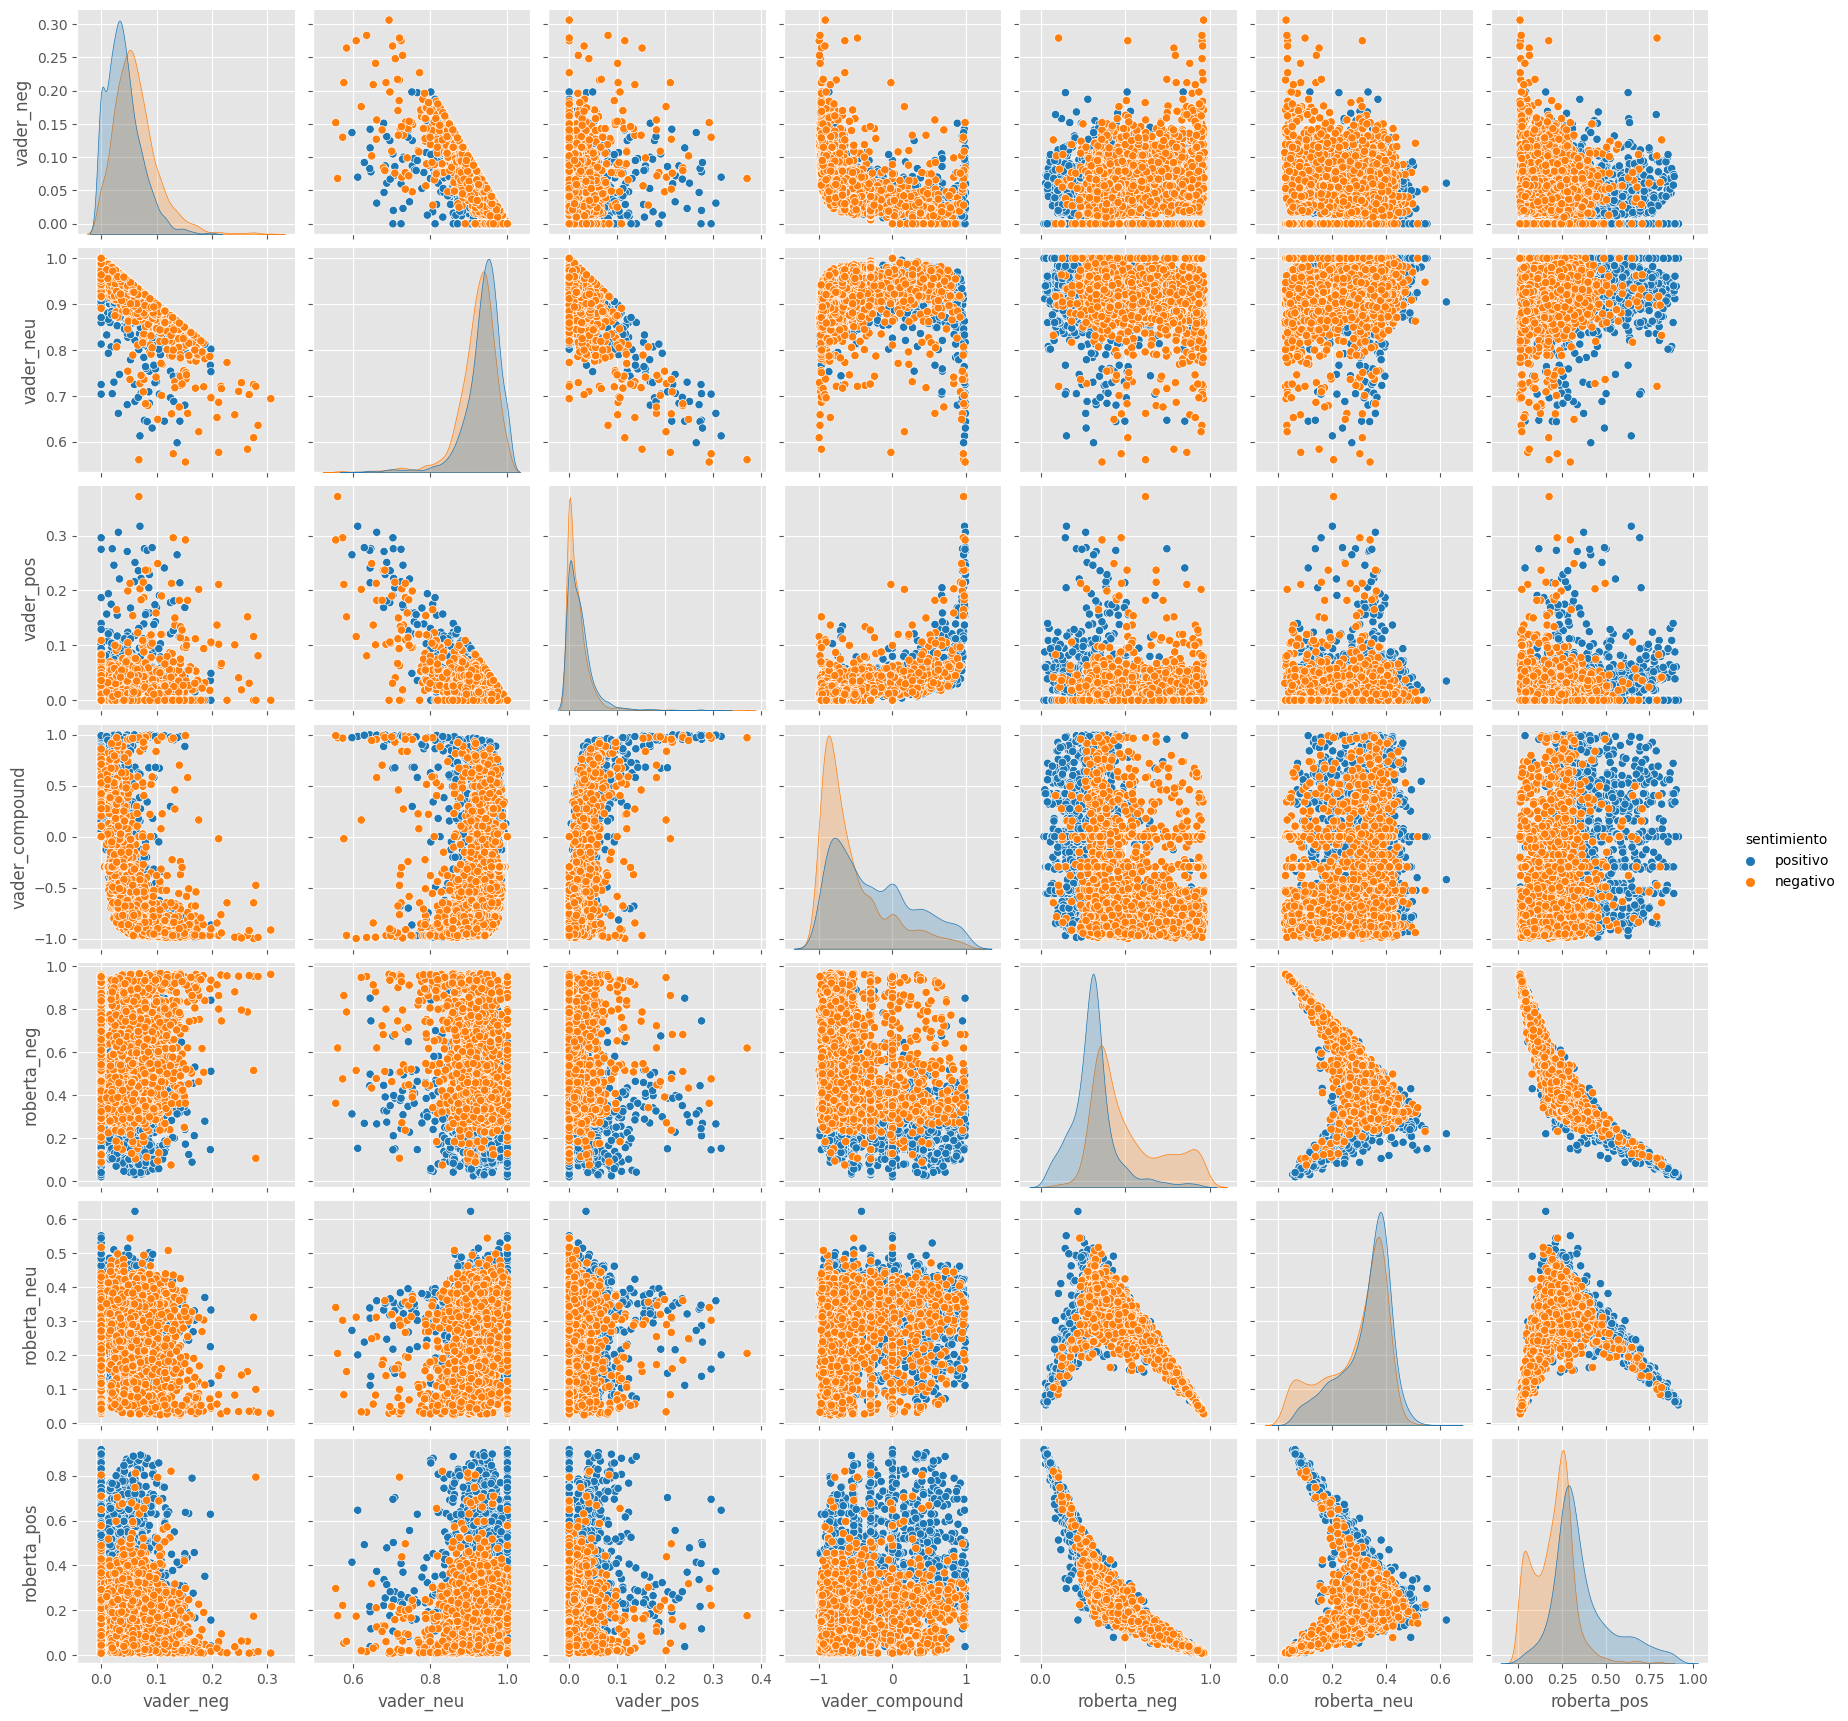

In [49]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='sentimiento',
            palette='tab10')
plt.show()

In [50]:
results_df.to_csv('roberta_vader_results_MOVIES.csv', index=True)

In [92]:
groundtruth = df_clean['sentimiento']
groundtruth = groundtruth.replace('positivo', 1.0)
groundtruth = groundtruth.replace('negativo', 0.0)
groundtruth.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: sentimiento, dtype: float64

In [81]:
def classify_sentiment_VADER(row):
    """Classifies sentiment of a text based on VADER sentiment analysis results.

    Args:
        row (pandas.Series): A row of a pandas DataFrame containing VADER sentiment analysis results.

    Returns:
        Tuple[str, float]: A tuple containing the sentiment label and score.

    """
    if row['compound'] > 0.05:
        return [1, row['compound']]
    elif row['compound'] < -0.05:
        return [0, row['compound']]
    else:
        if row['neg'] > row['pos']:
            return [0, row['neg']]
        elif row['neg'] < row['pos']:
            return [1, row['pos']]
        else:    
            return [0, row['neu']]

results_vader_final = vaders.apply(classify_sentiment_VADER, axis=1, result_type='expand')
results_vader_final.columns = ['Sentiment', 'Score']

In [82]:
results_vader_final.head()

,Sentiment,Score
0,1.0,0.8597
1,1.0,0.9842
2,1.0,0.8715
3,0.0,-0.8748
4,1.0,0.9533


<Axes: >

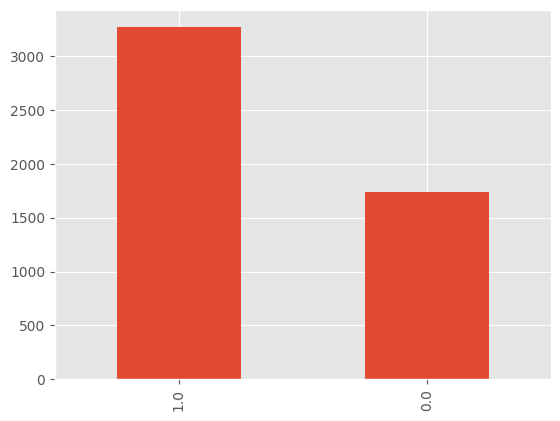

In [83]:
results_vader_final['Sentiment'].value_counts().plot(kind='bar')

In [84]:
results_vader_final.shape

(5000, 2)

In [93]:
from sklearn.metrics import accuracy_score, classification_report

print(f"El score de precision del analisis de VADER sobre el dataset fue: {accuracy_score(results_vader_final['Sentiment'], groundtruth):.2f}")
print(classification_report(results_vader_final['Sentiment'], groundtruth))

El score de precision del analisis de VADER sobre el dataset fue: 0.70
              precision    recall  f1-score   support

         0.0       0.55      0.79      0.64      1734
         1.0       0.85      0.65      0.74      3266

    accuracy                           0.70      5000
   macro avg       0.70      0.72      0.69      5000
weighted avg       0.75      0.70      0.71      5000



In [97]:
def classify_sentiment_ROBERTA(row):
    """Classifies sentiment of a text based on ROBERTA sentiment analysis results.

    Args:
        row (pandas.Series): A row of a pandas DataFrame containing ROBERTA sentiment analysis results.

    Returns:
        Tuple[str, float]: A tuple containing the sentiment label and score.

    """
    if row['roberta_neg'] > row['roberta_pos']:
        return [0, row['roberta_neg']]
    elif row['roberta_neg'] < row['roberta_pos']:
        return [1, row['roberta_pos']]
    else:
        return [0, row['roberta_neu']]


results_roberta_final = results_df.apply(classify_sentiment_ROBERTA, axis=1, result_type='expand')
results_roberta_final.columns = ['Sentiment', 'Score']


In [98]:
results_roberta_final.head()

,Sentiment,Score
0,0.0,0.508365
1,1.0,0.322914
2,0.0,0.488104
3,0.0,0.338856
4,0.0,0.386783


<Axes: >

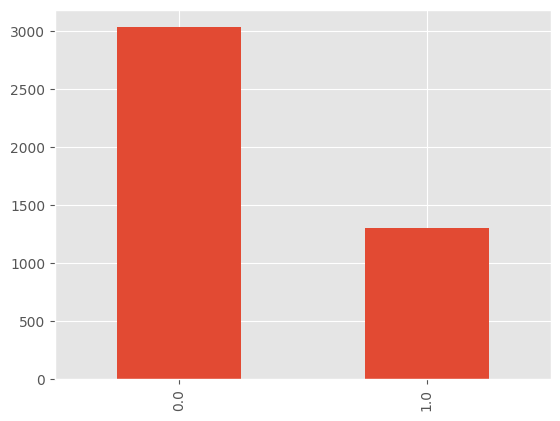

In [99]:
results_roberta_final['Sentiment'].value_counts().plot(kind='bar')

In [100]:
results_roberta_final.shape

(4338, 2)

In [101]:
roberta_metrics = groundtruth.drop(groundtruth.index[puteao+puteaoRuntime])
roberta_metrics.shape

(4338,)

In [102]:
print(f"El score de precision del analisis de ROBERTA sobre el dataset fue: {accuracy_score(results_roberta_final['Sentiment'], roberta_metrics):.2f}")
print(classification_report(results_roberta_final['Sentiment'], roberta_metrics))

El score de precision del analisis de ROBERTA sobre el dataset fue: 0.72
              precision    recall  f1-score   support

         0.0       0.91      0.66      0.77      3036
         1.0       0.52      0.85      0.65      1302

    accuracy                           0.72      4338
   macro avg       0.72      0.76      0.71      4338
weighted avg       0.80      0.72      0.73      4338

